In [179]:
def save_to_github(commit_message):
    # Automates the git workflow: add, commit and push
    !git pull
    print("Staging changes...")
    !git add .

    print(f"Committing with message: {commit_message} ...")
    !git commit -m f"{commit_message}"

    print("Pushing to Github...")
    !git push origin main

    print("Done! Check your repository.")


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [88]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [89]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [90]:
df = df.dropna()

In [91]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [92]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


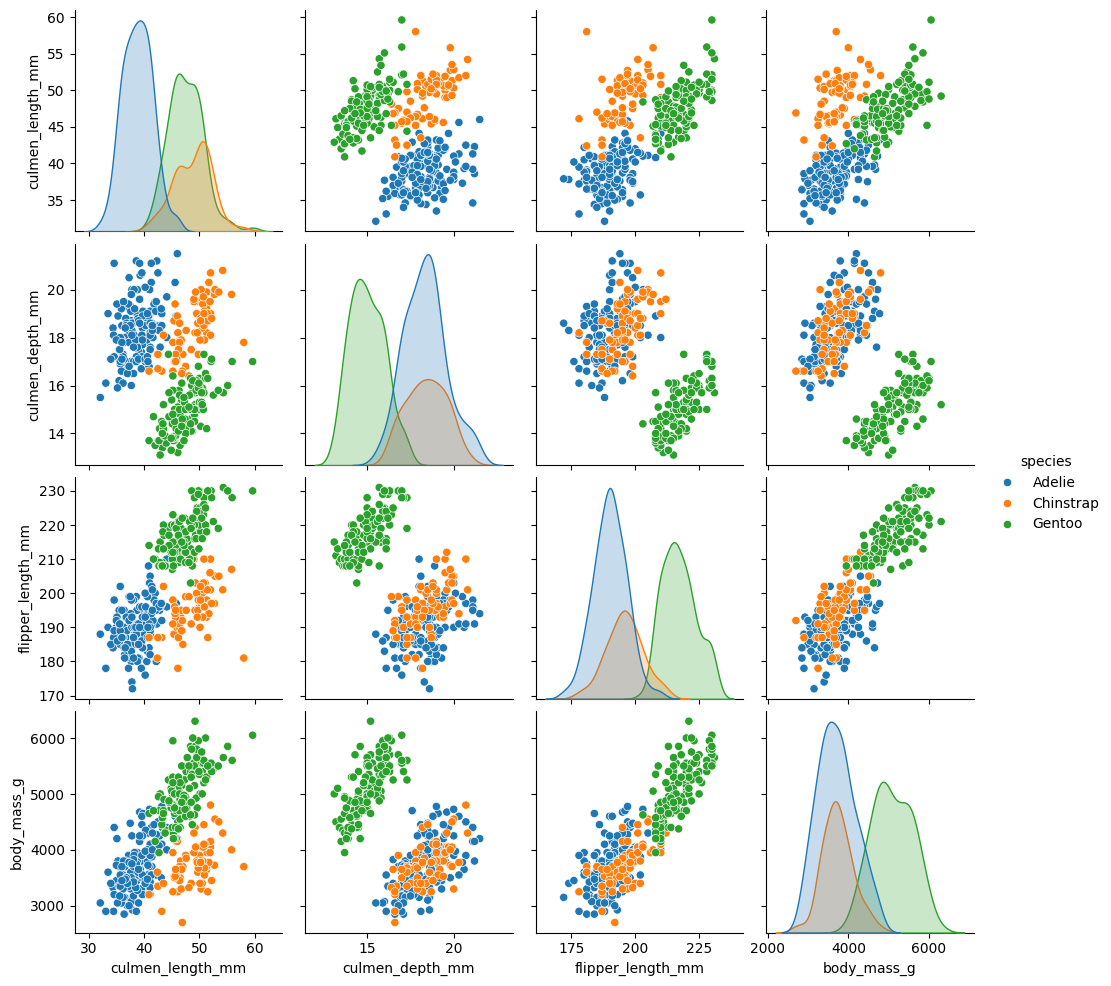

In [93]:
sns.pairplot(df, hue='species')

In [94]:
# Let's convert the categorial data into numerical data using one-hot encoding
X = pd.get_dummies(df.drop('species', axis=1),drop_first=True, dtype=int)

In [95]:
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,1,0,1


In [96]:
y = df['species']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rfc = RandomForestClassifier(n_estimators=200, random_state=101)

In [101]:
rfc.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [102]:
y_preds = rfc.predict(X_test)

In [103]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [104]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [105]:
confusion = confusion_matrix(y_test, y_preds)

In [106]:
cmd = ConfusionMatrixDisplay(confusion, display_labels=True)

TypeError: 1 must be a sequence

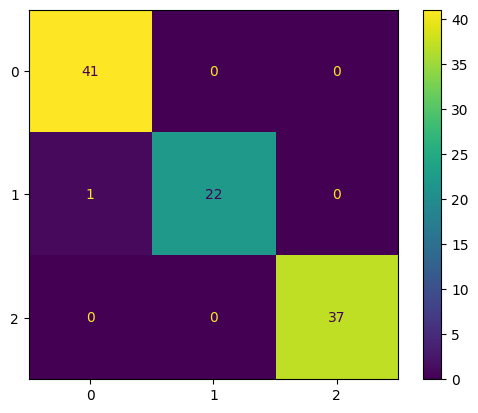

In [107]:
cmd.plot()

In [108]:
# Let's work on different dataset

In [109]:
df = pd.read_csv("../DATA/data_banknote_authentication.csv")

In [110]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [111]:
df.isna().sum()

Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64

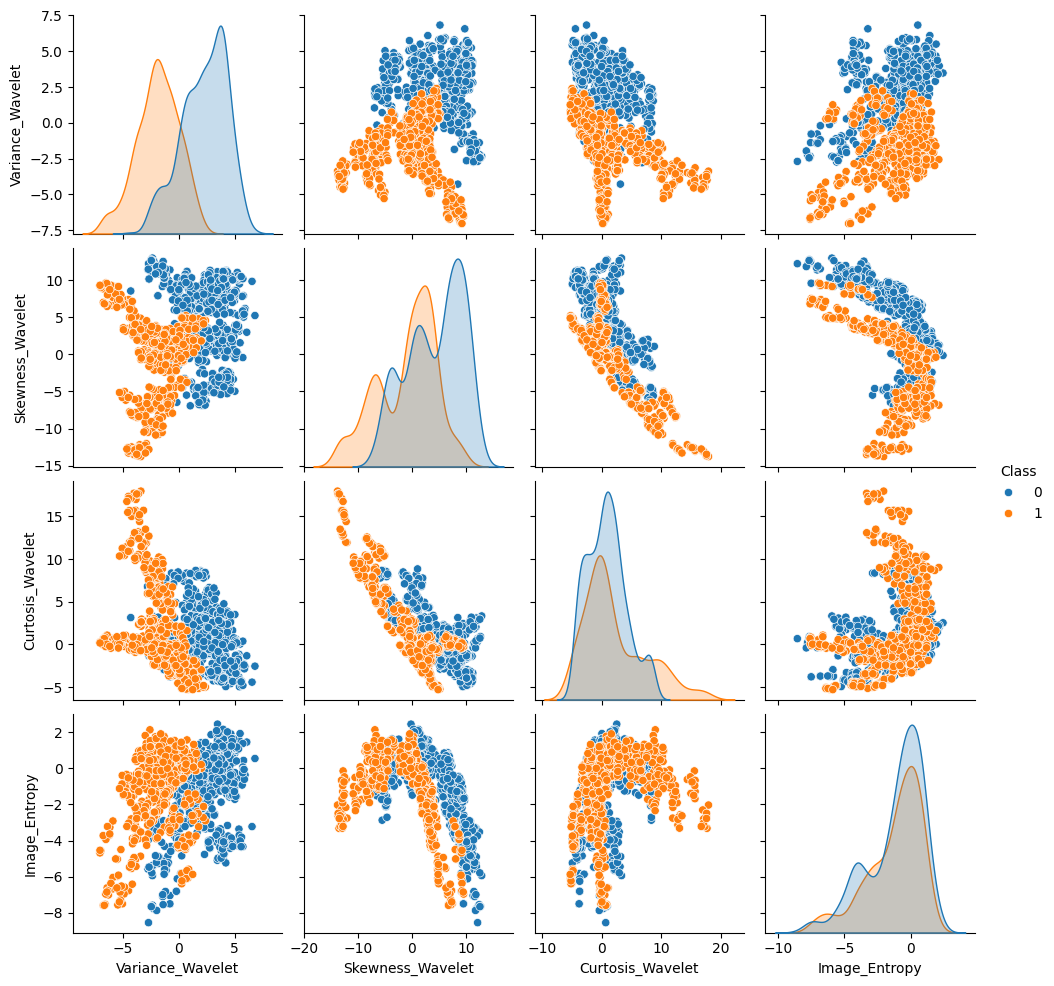

In [112]:
sns.pairplot(df, hue='Class')

In [113]:
X = df.drop('Class', axis=1)

In [114]:
y = df['Class']

In [115]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [116]:
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rfc = RandomForestClassifier()

In [119]:
n_estimators = [100, 200, 300, 400]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [120]:
param_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'oob_score':oob_score
}

In [121]:
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

In [122]:
grid.fit(X_train, y_train)

/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/hom

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [100, 200, ...], 'oob_score': [True, False]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidat

In [123]:
grid_preds = grid.predict(X_test)

In [124]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 200, 'oob_score': True}

In [125]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [126]:
confusion_matrix(y_test, grid_preds)

array([[235,   3],
       [  0, 174]])

In [127]:
error = []
misclassification = []

for n in range(1, 300):
    rfc = RandomForestClassifier(n_estimators=n)
    rfc.fit(X_train, y_train)
    y_preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test, y_preds)
    misclassify = np.sum(y_test != y_preds)

    error.append(err)
    misclassification.append(misclassify)

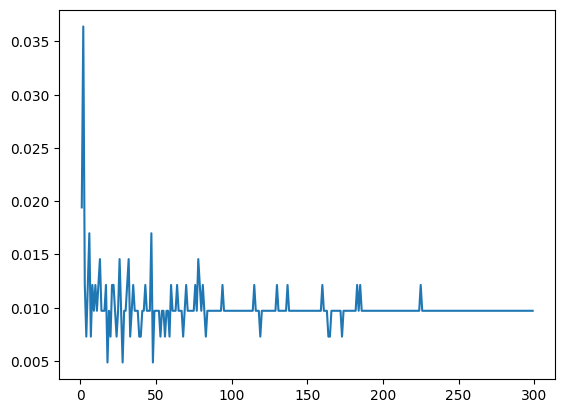

In [128]:
plt.plot(range(1,300), error)

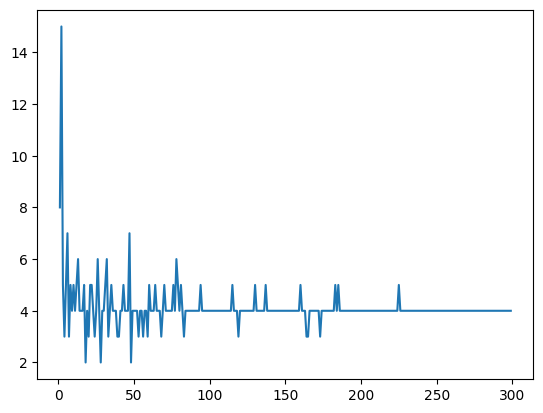

In [129]:
plt.plot(range(1,300), misclassification)

In [130]:
# Random Forest Regression

In [131]:
df = pd.read_csv("../DATA/rock_density_xray.csv")

In [132]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [133]:
df.columns

Index(['Rebound Signal Strength nHz', 'Rock Density kg/m3'], dtype='object')

In [134]:
df.columns = ['Signal', 'Density']

In [135]:
df.columns

Index(['Signal', 'Density'], dtype='object')

<Axes: xlabel='Signal', ylabel='Density'>

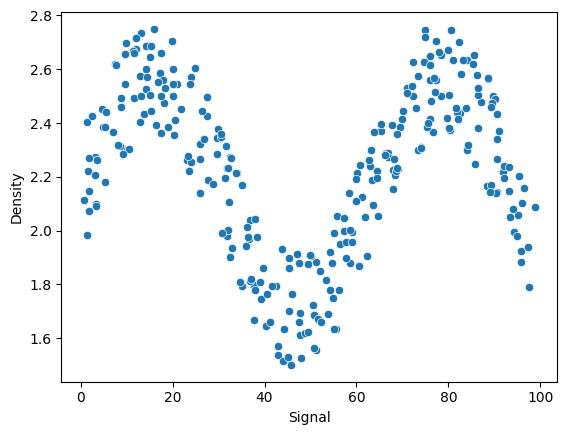

In [136]:
sns.scatterplot(data=df, x='Signal', y='Density')

In [138]:
X = df['Signal'].values.reshape(-1,1)

In [139]:
y = df['Density']

In [140]:
from sklearn.model_selection import train_test_split

In [143]:
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
lr_model = LinearRegression()

In [146]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [147]:
def run_model(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Get Metrics
    y_preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_preds)
    rmse = root_mean_squared_error(y_test, y_preds)
    print(f"""
    Results:\n
    MAE: {mae}\n
    RMSE: {rmse}\n
    """)

    # Plot the results of model based on signal range
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))

    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(data=df, x='Signal', y='Density', color='black')

    plt.plot(signal_range, signal_preds)


    Results:

    MAE: 0.2111989733186328

    RMSE: 0.25700519965846286

    


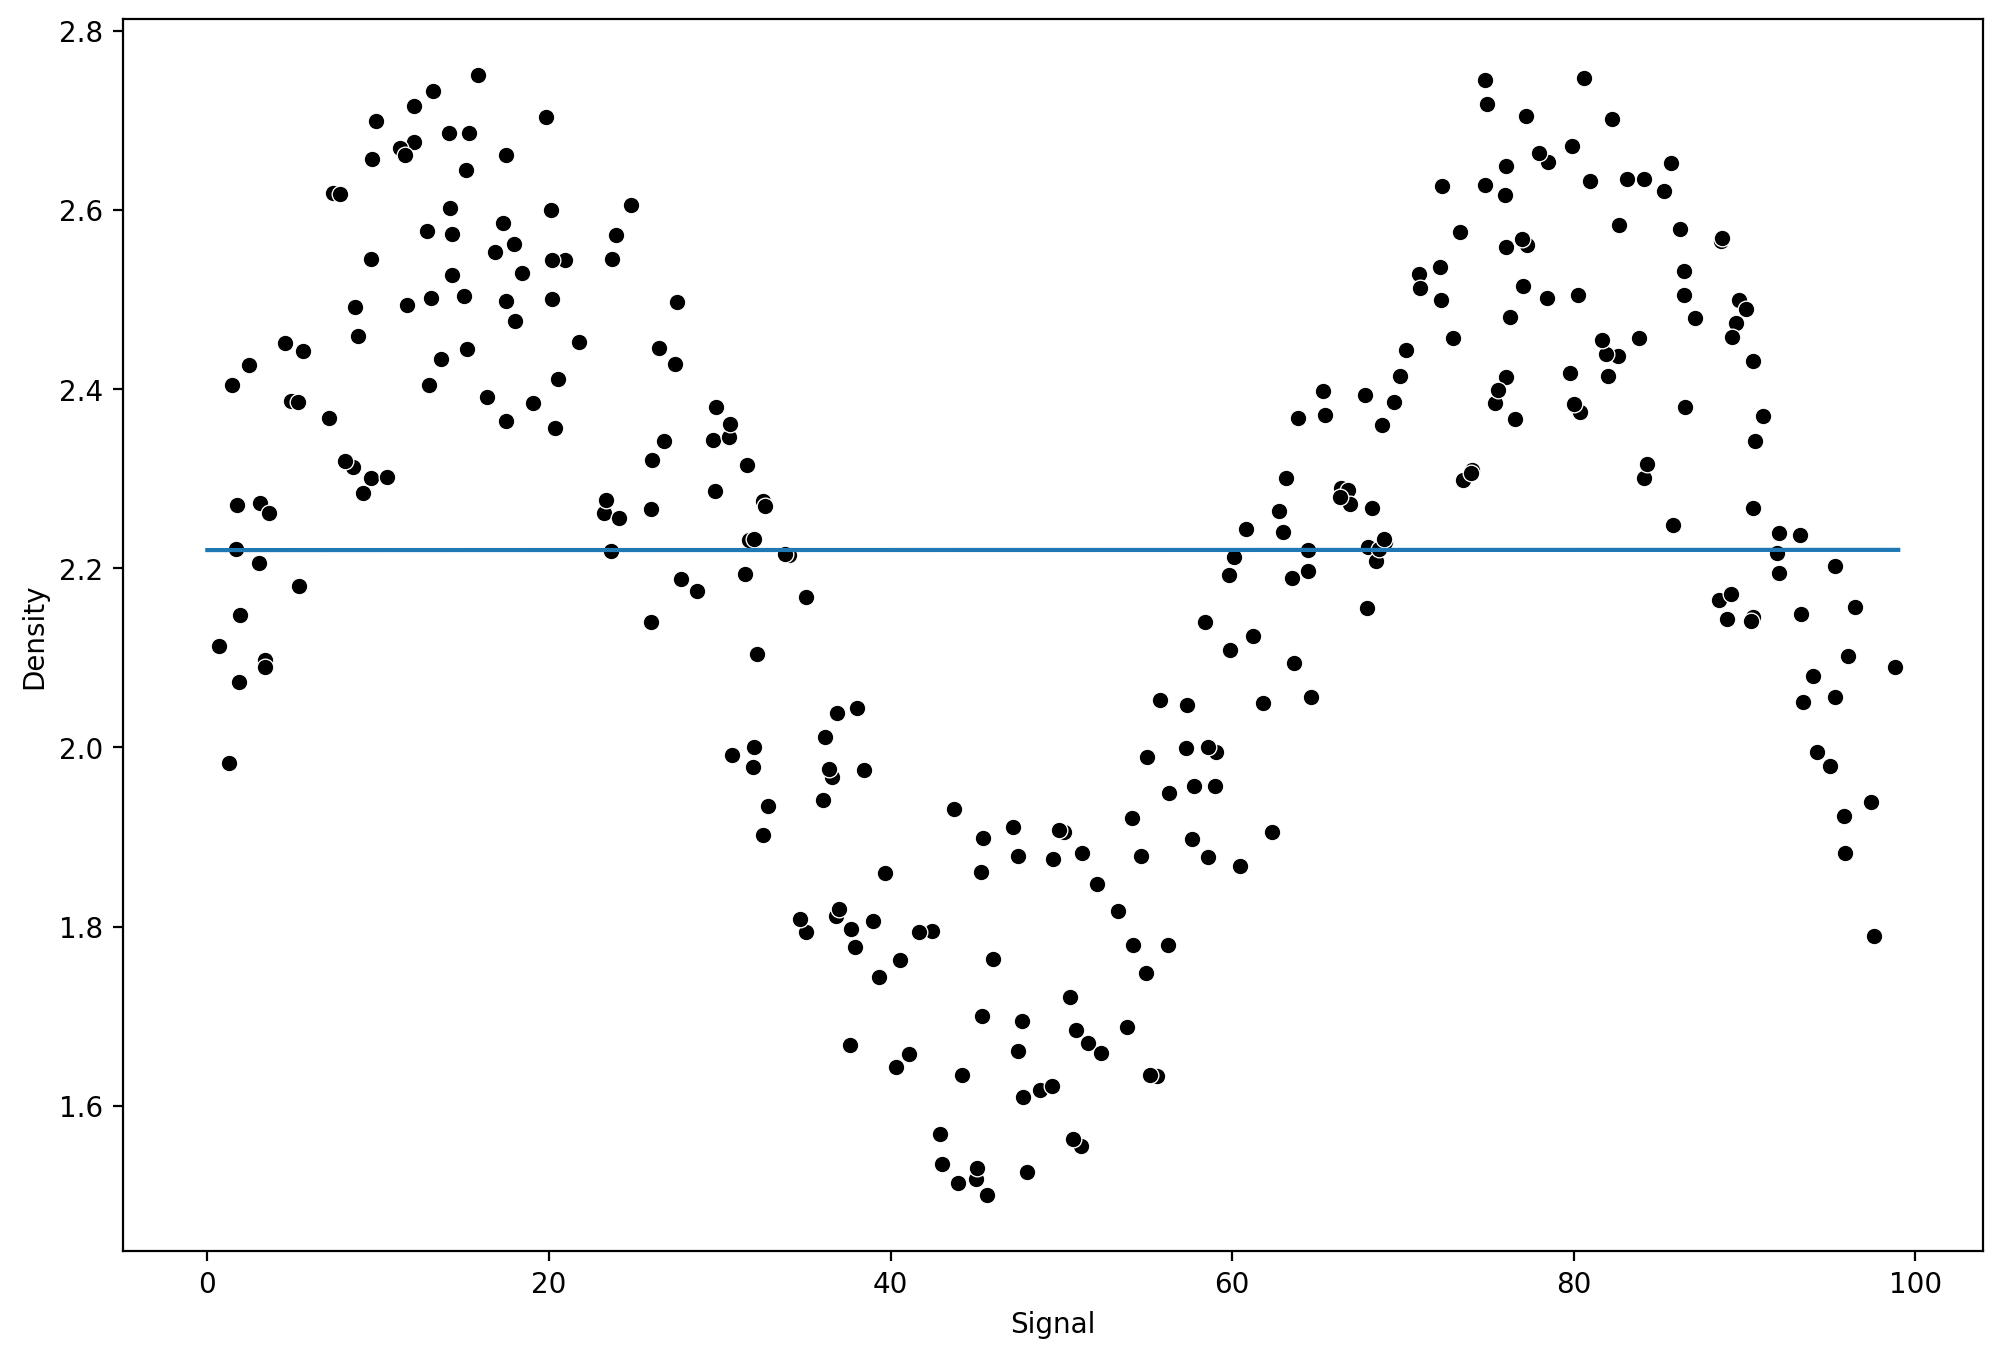

In [148]:
run_model(lr_model, X_train, y_train, X_test, y_test)

In [149]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [154]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())


    Results:

    MAE: 0.11969115457034438

    RMSE: 0.13807435634576873

    


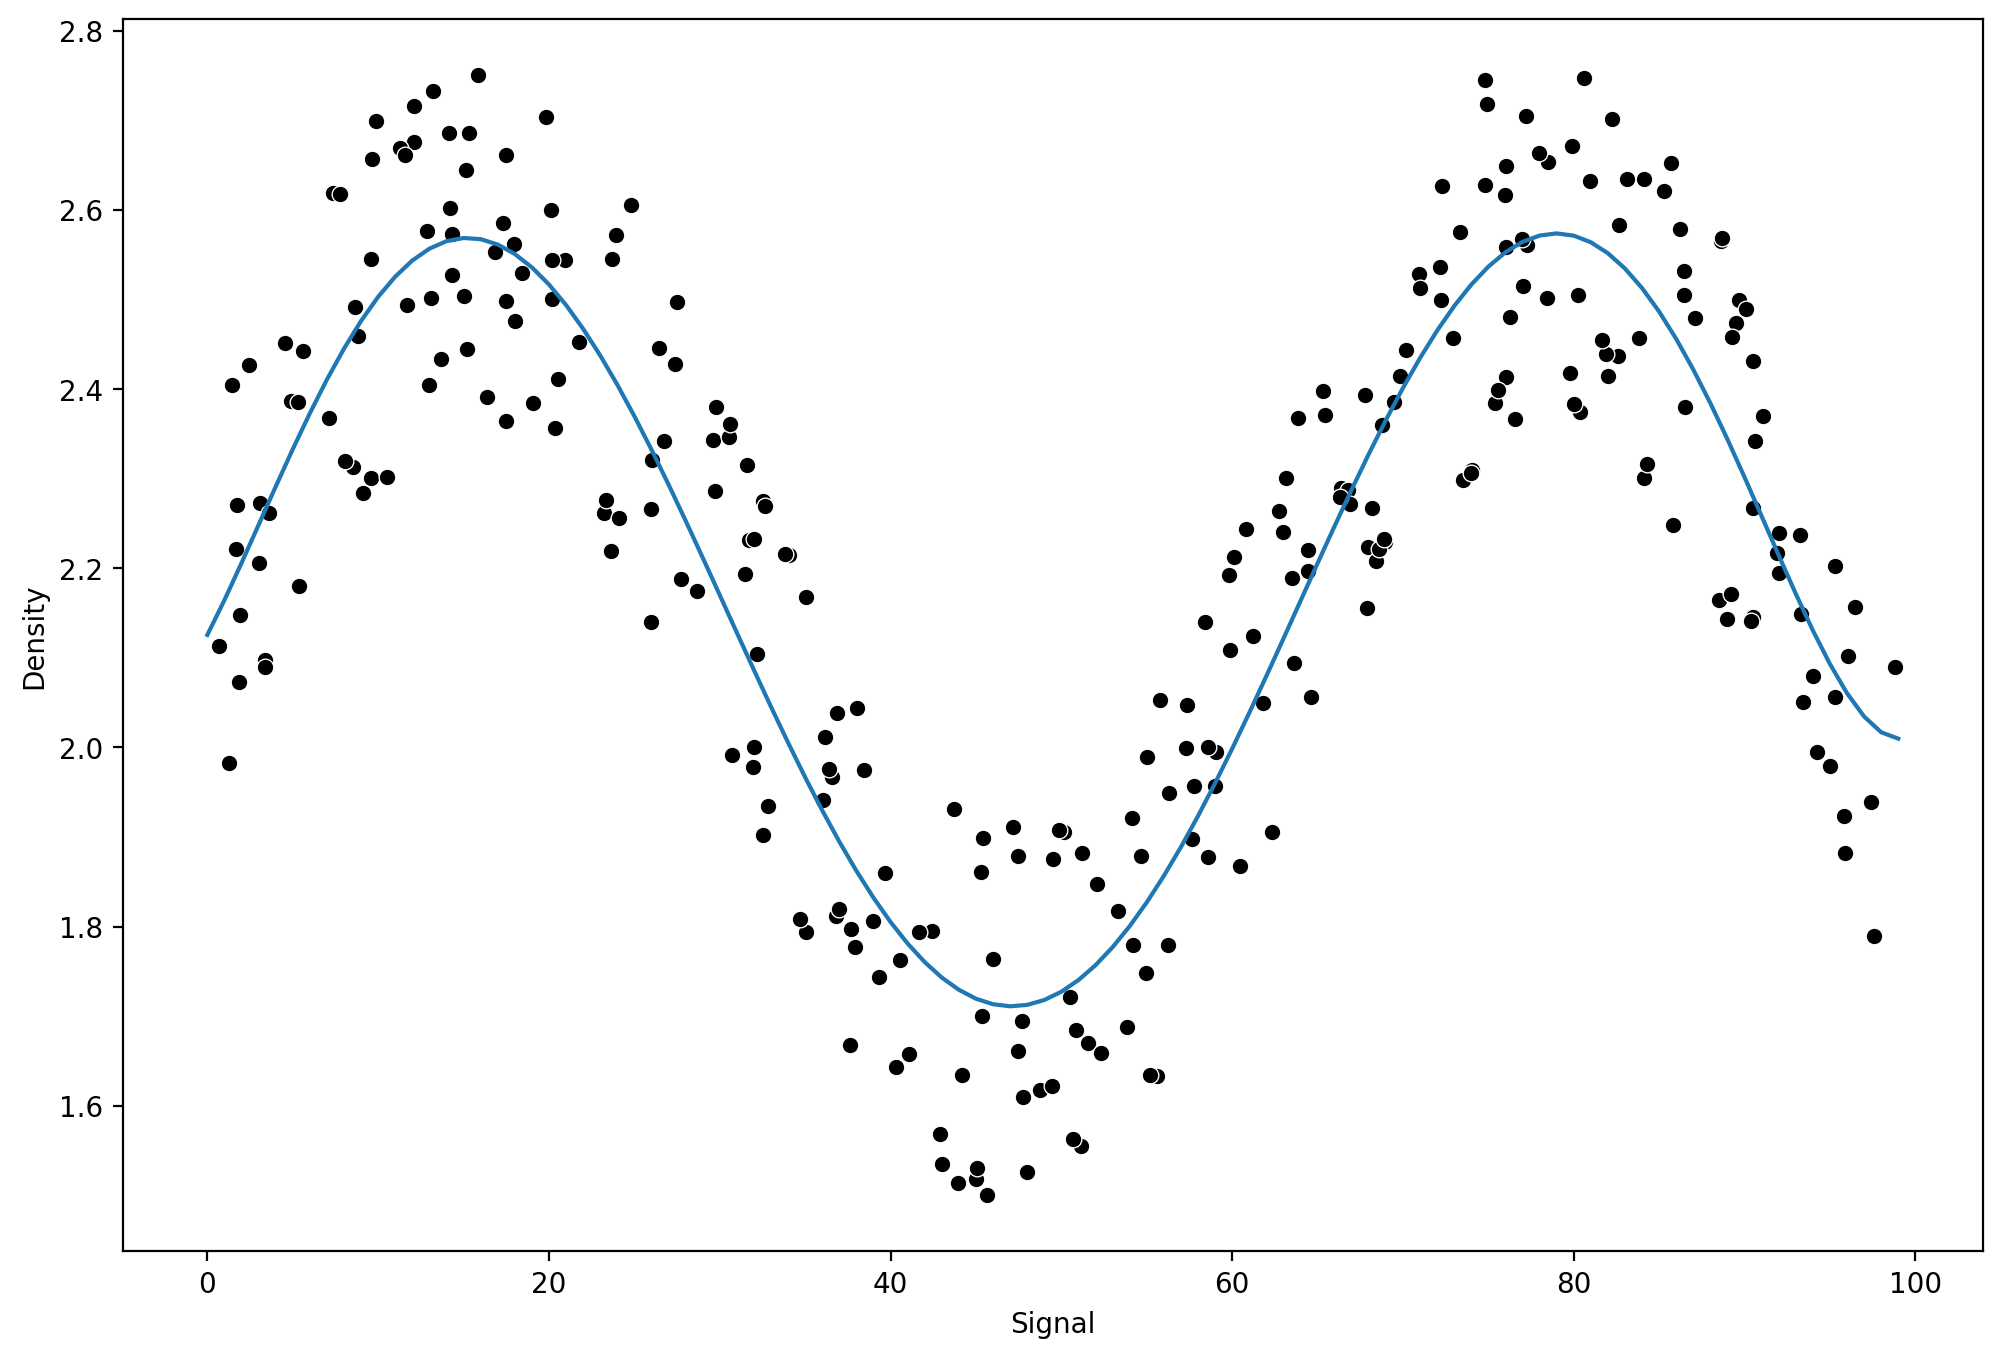

In [155]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [156]:
from sklearn.neighbors import KNeighborsRegressor


    Results:

    MAE: 0.11877297474442386

    RMSE: 0.15234870286353372

    

    Results:

    MAE: 0.12198383614100569

    RMSE: 0.13730685016923658

    

    Results:

    MAE: 0.11635971693292668

    RMSE: 0.13277855732740923

    

    Results:

    MAE: 0.12070309719171539

    RMSE: 0.13974991273788953

    

    Results:

    MAE: 0.13363165935705315

    RMSE: 0.15954234753677107

    


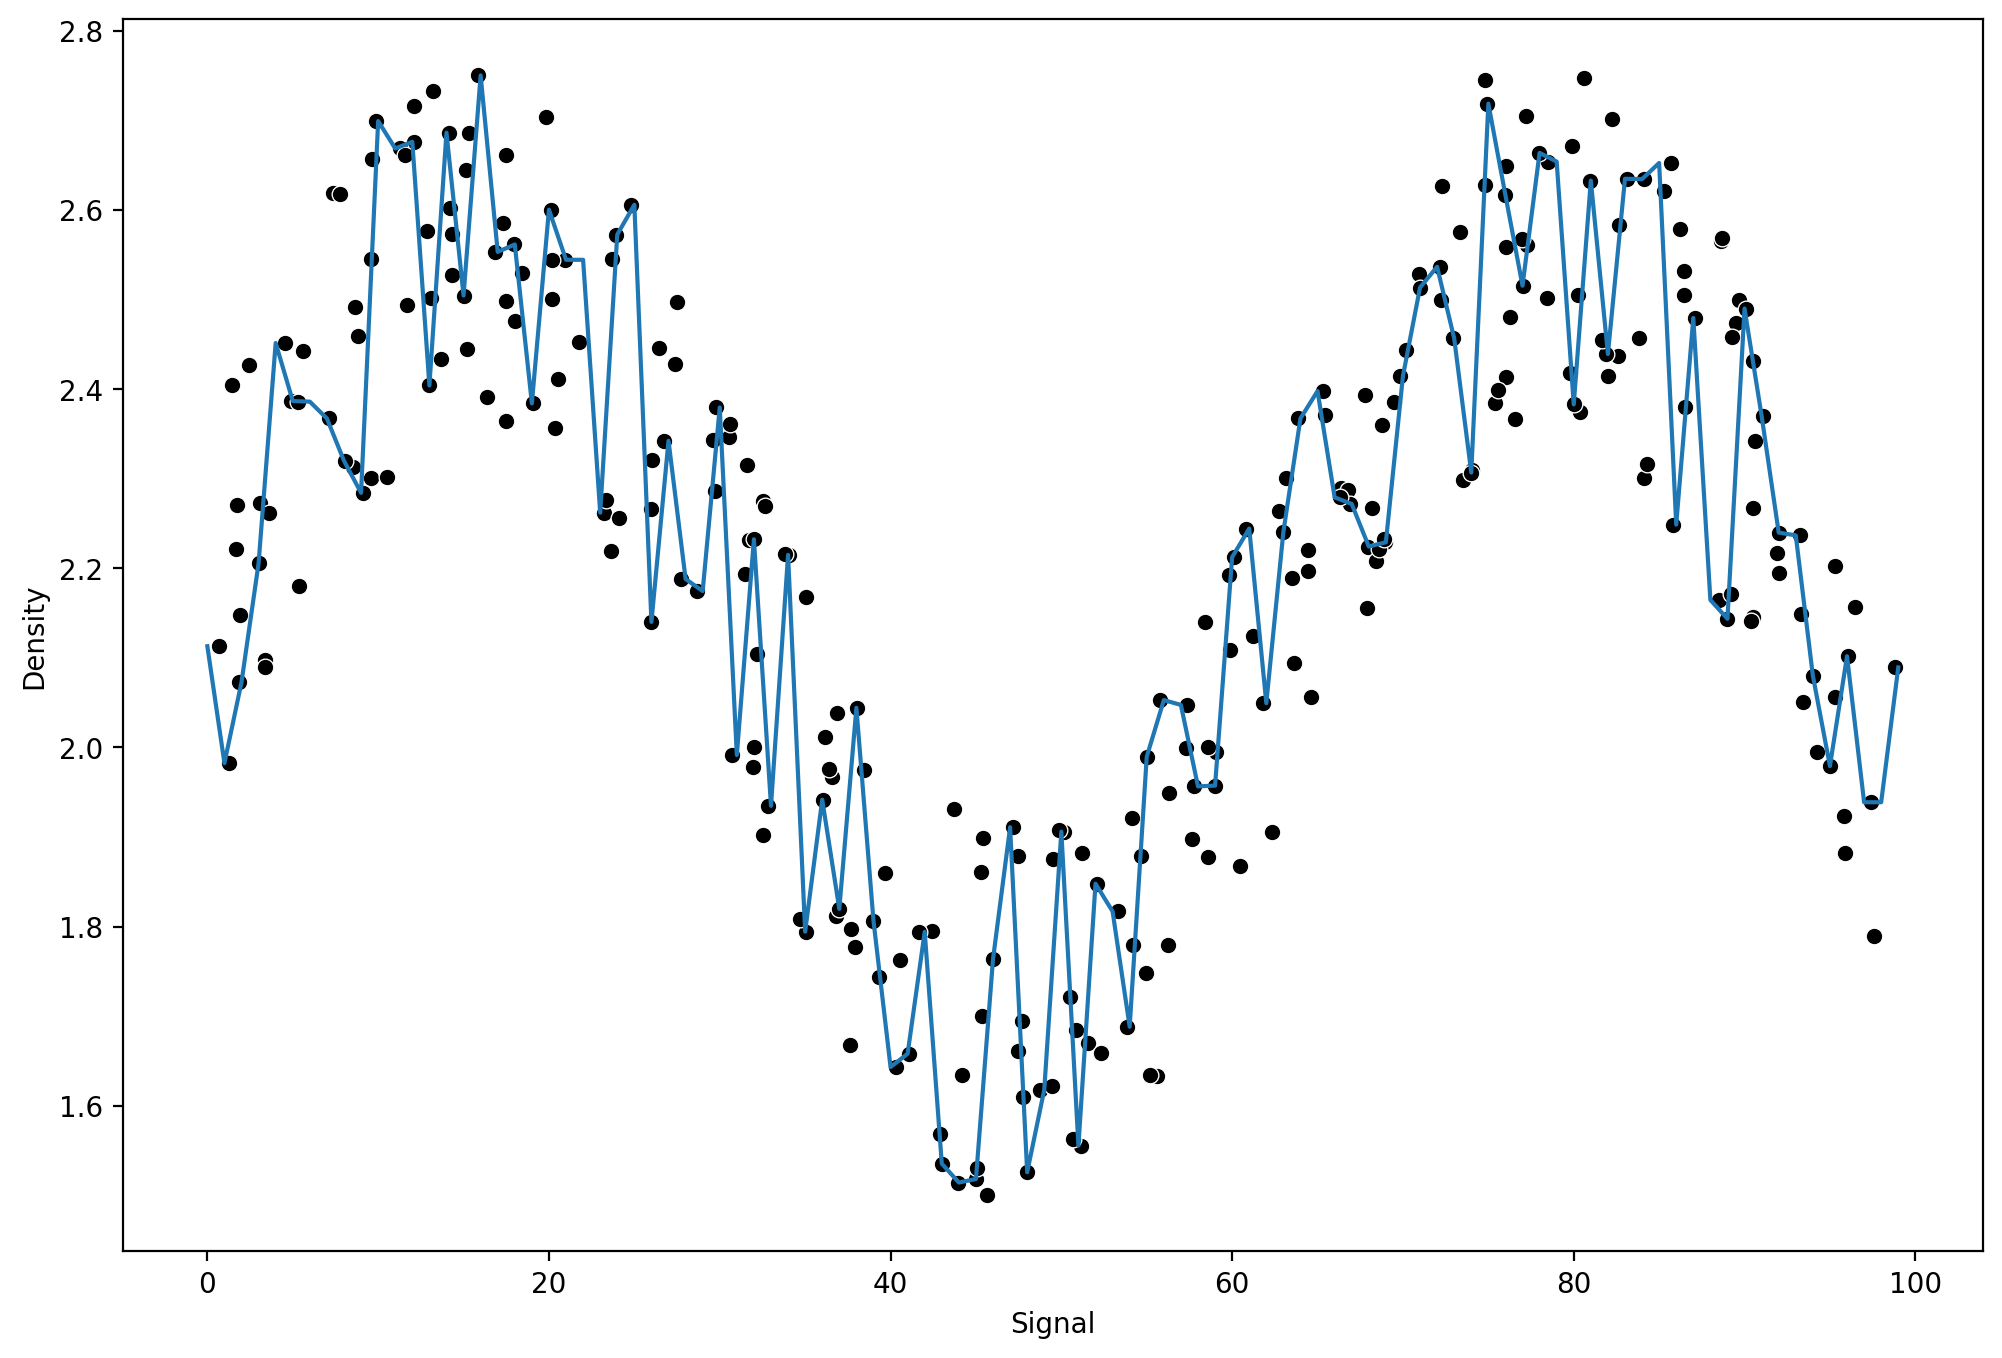

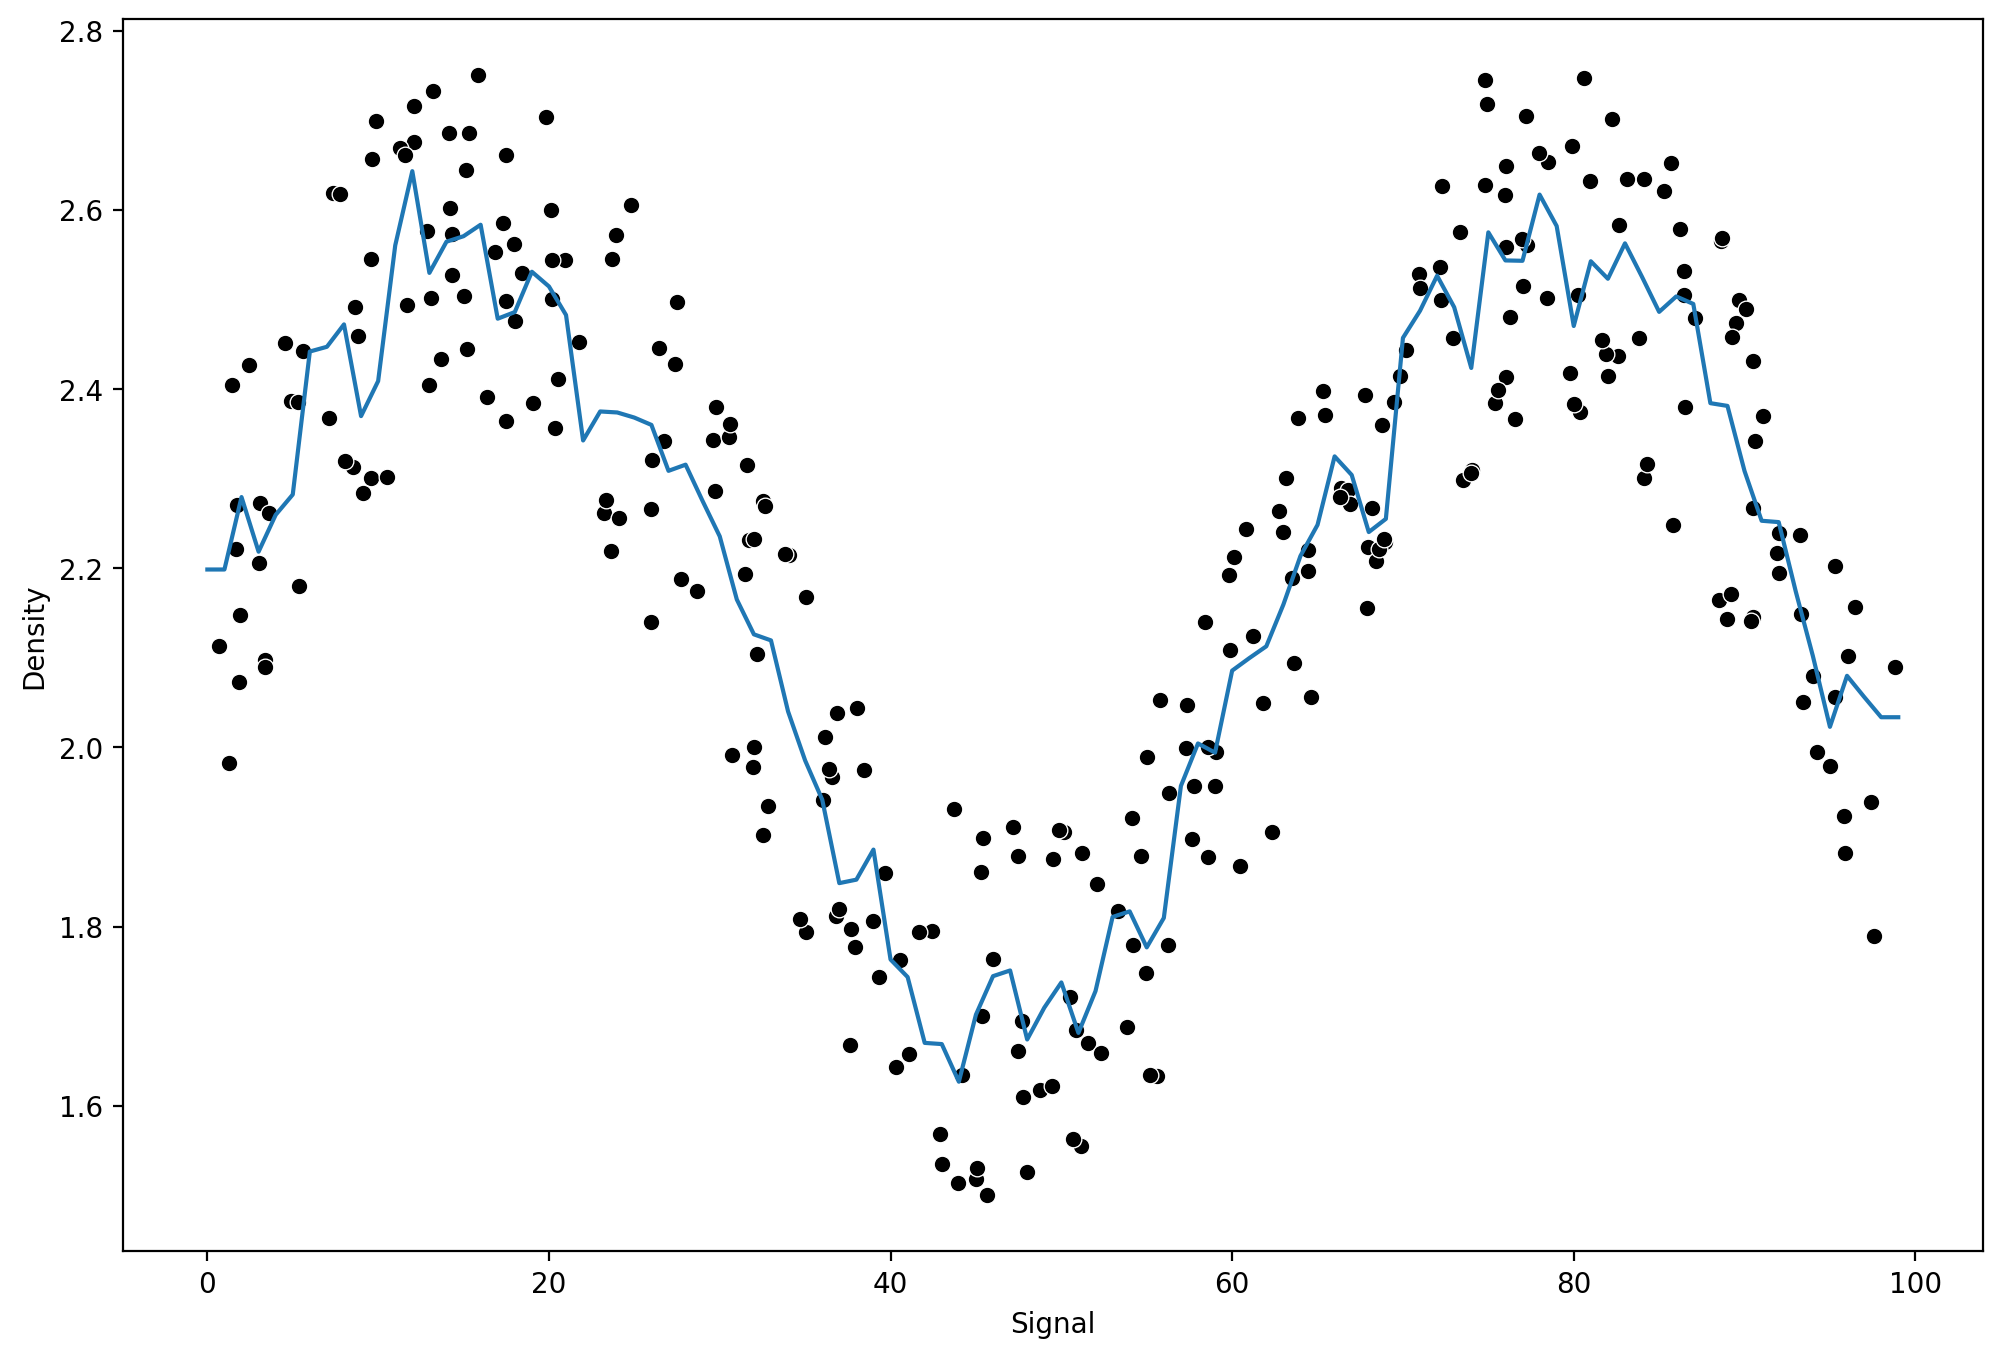

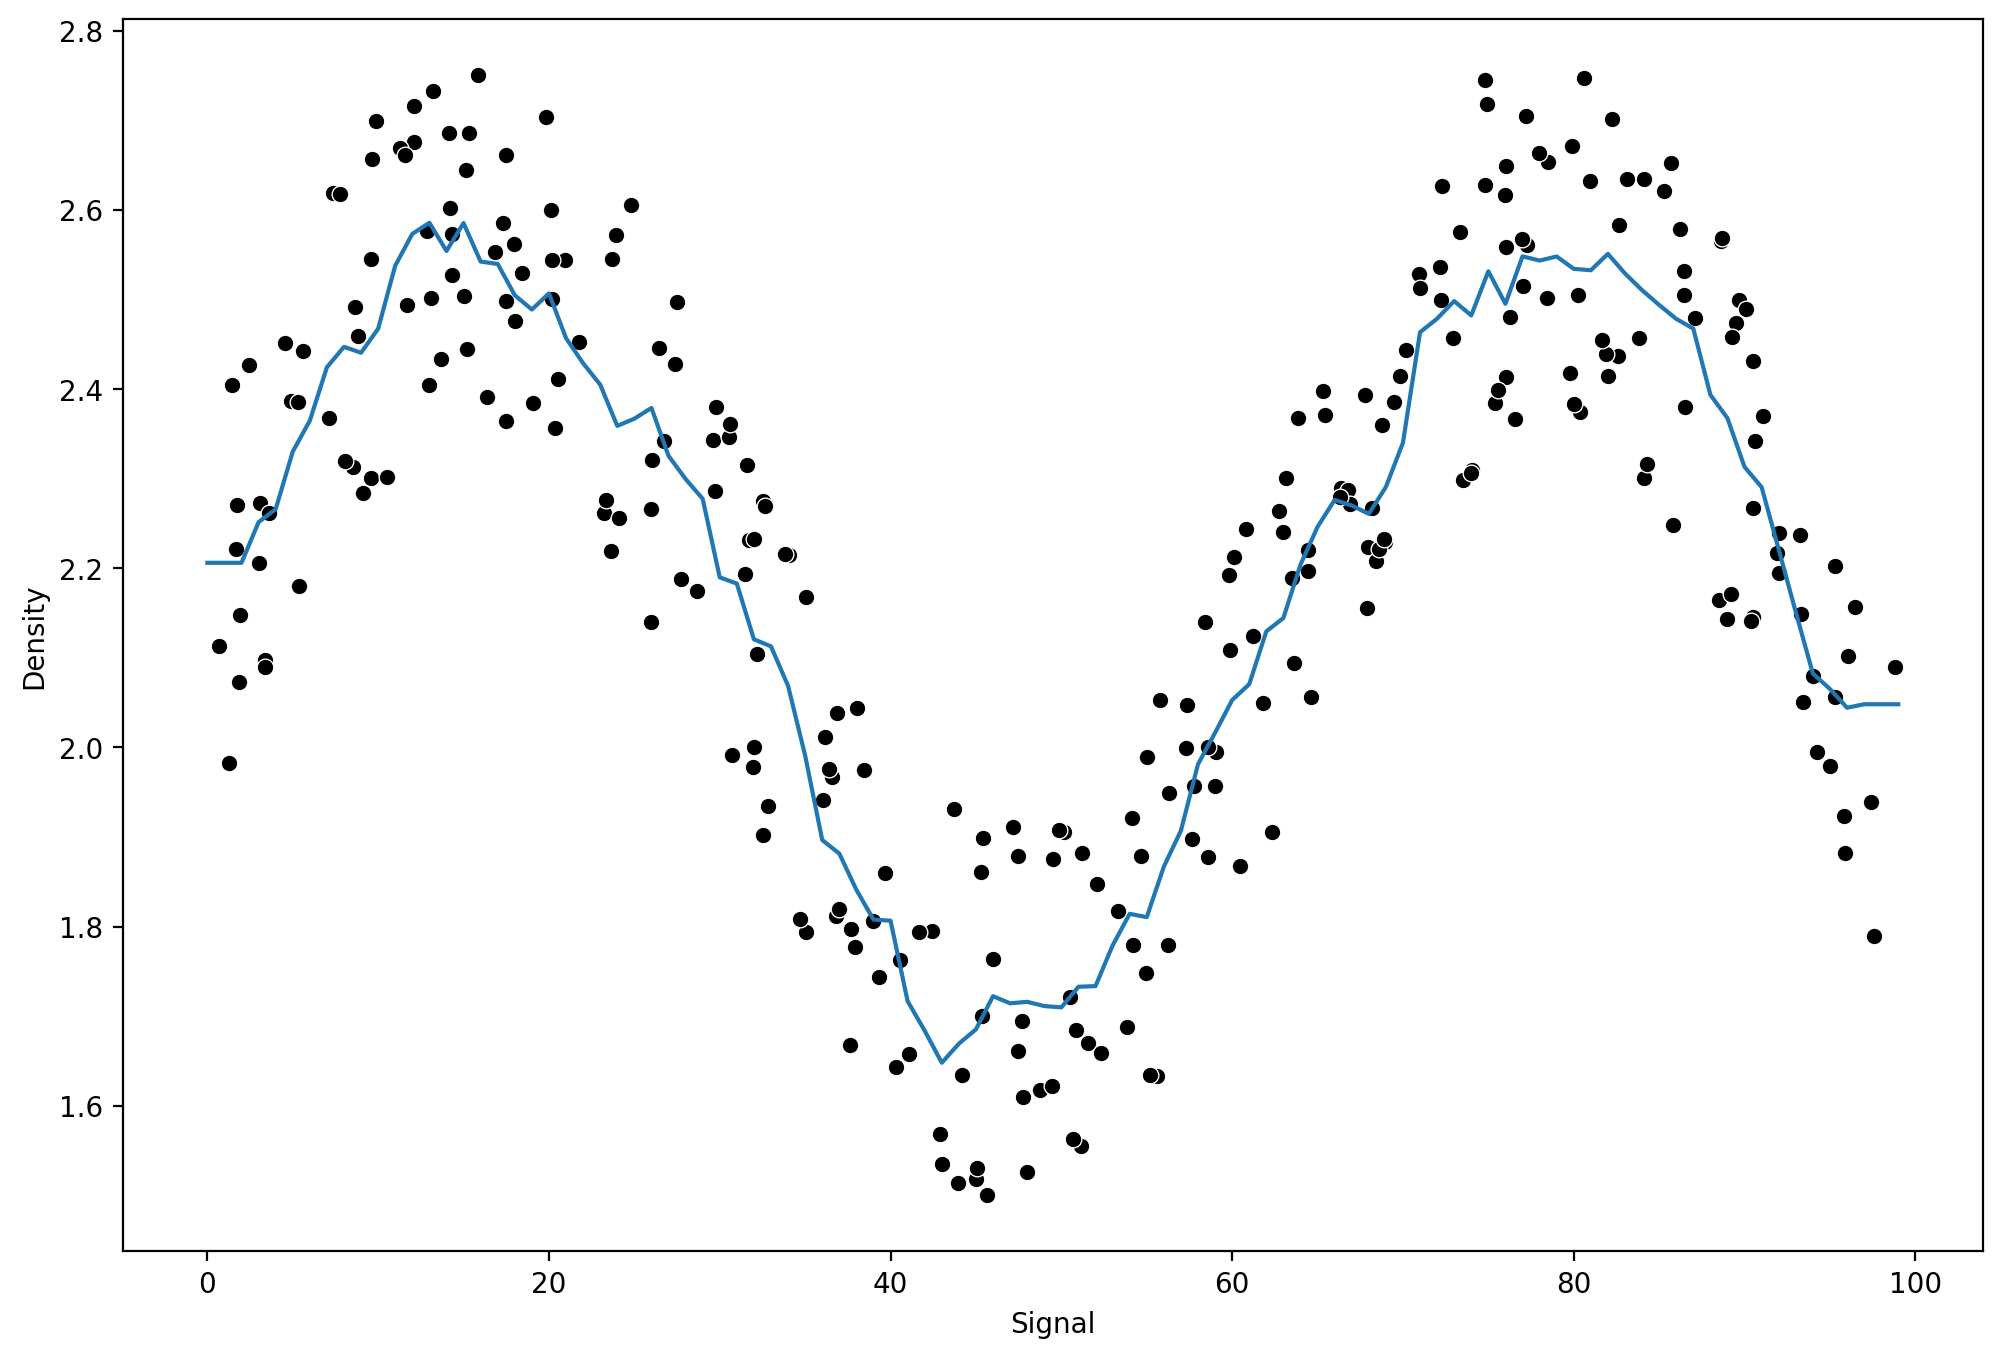

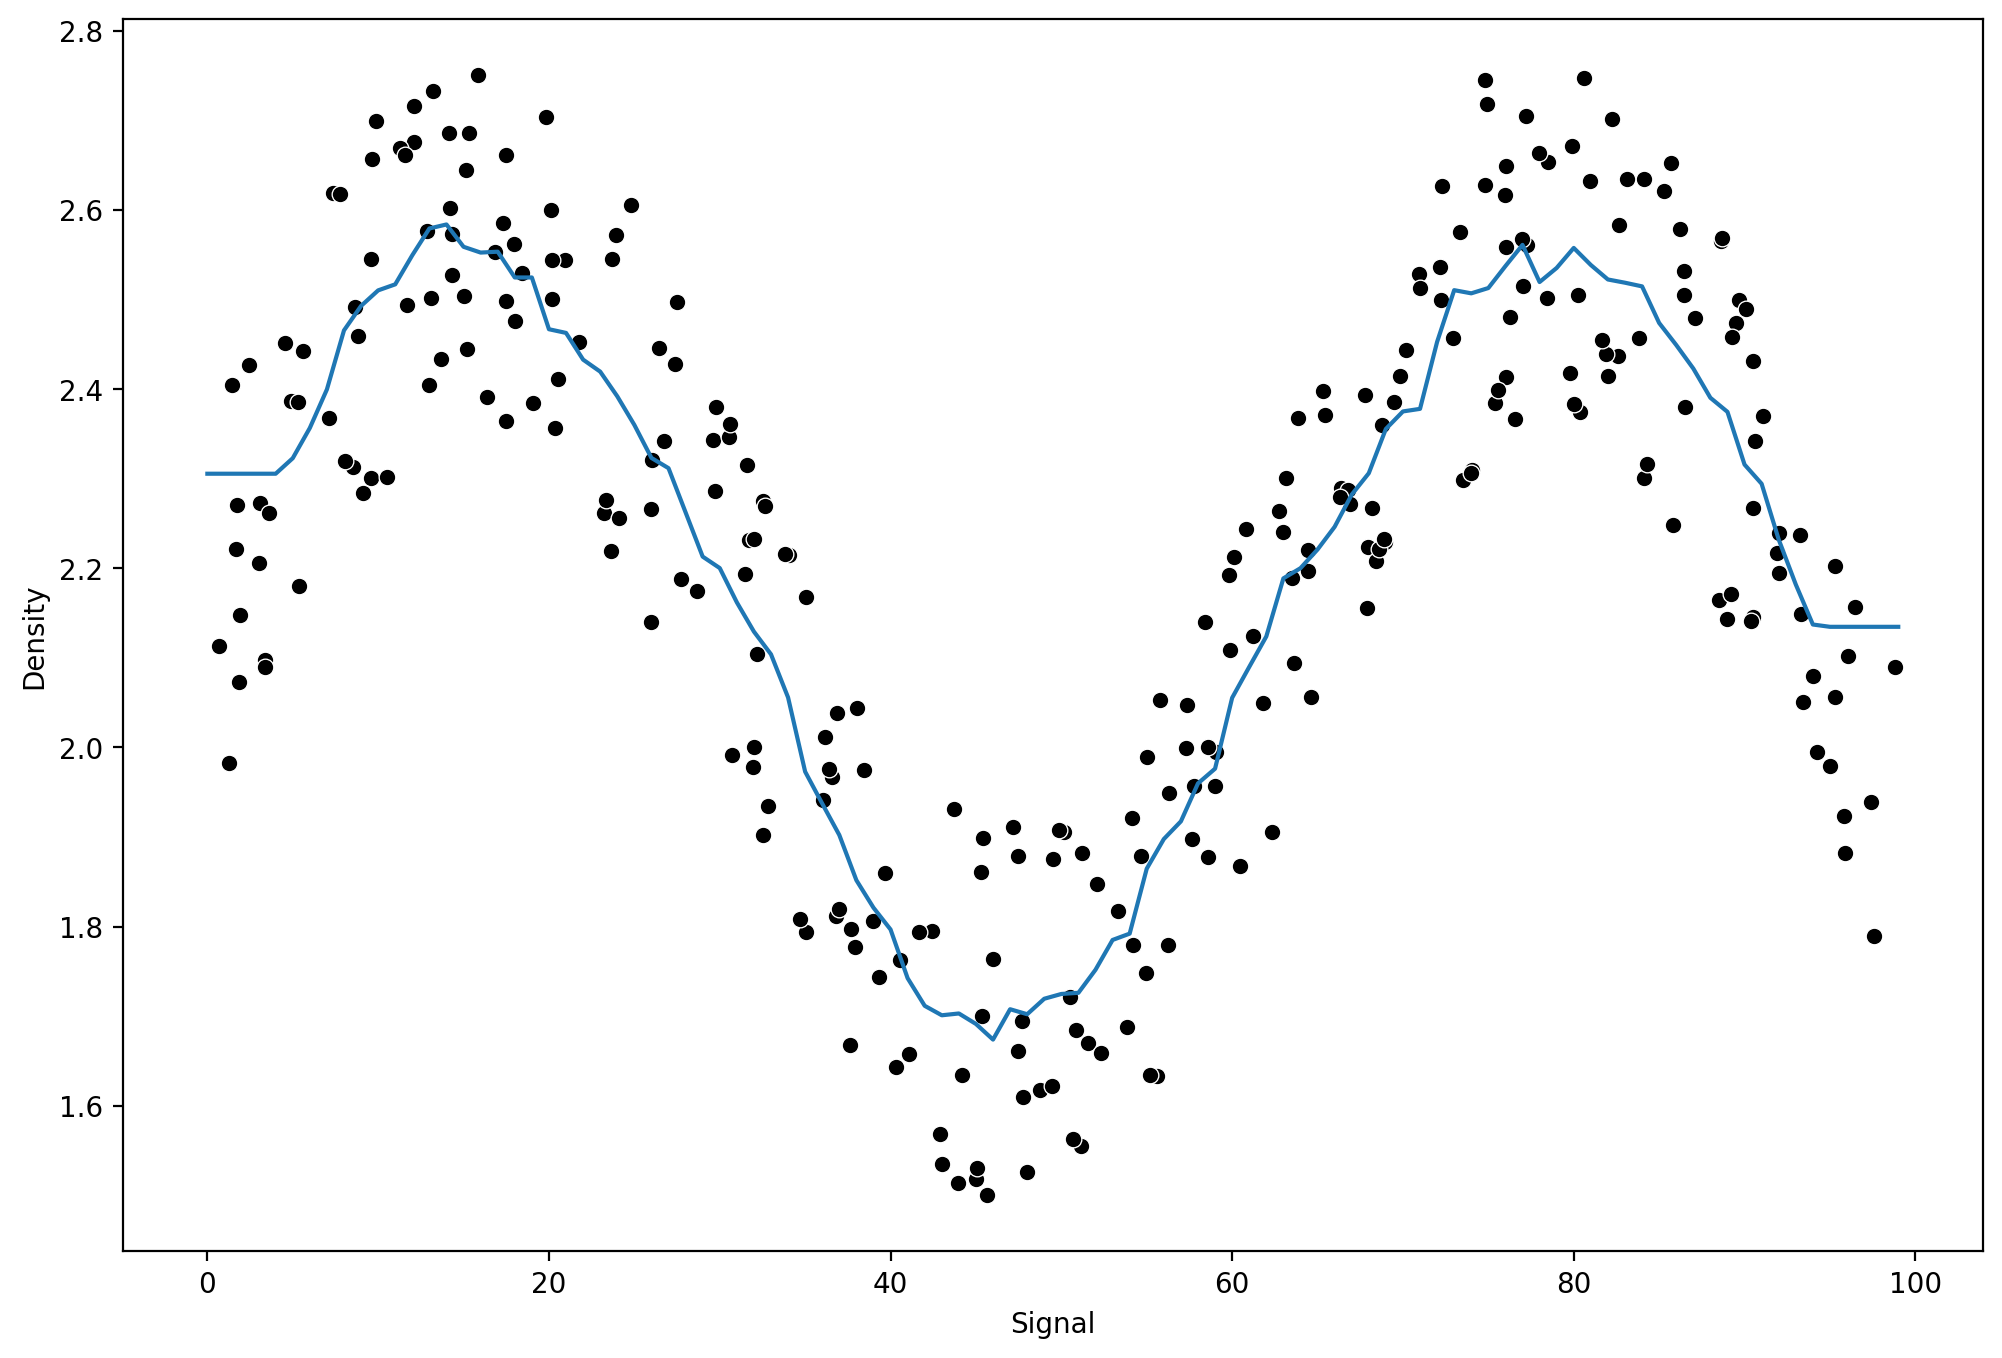

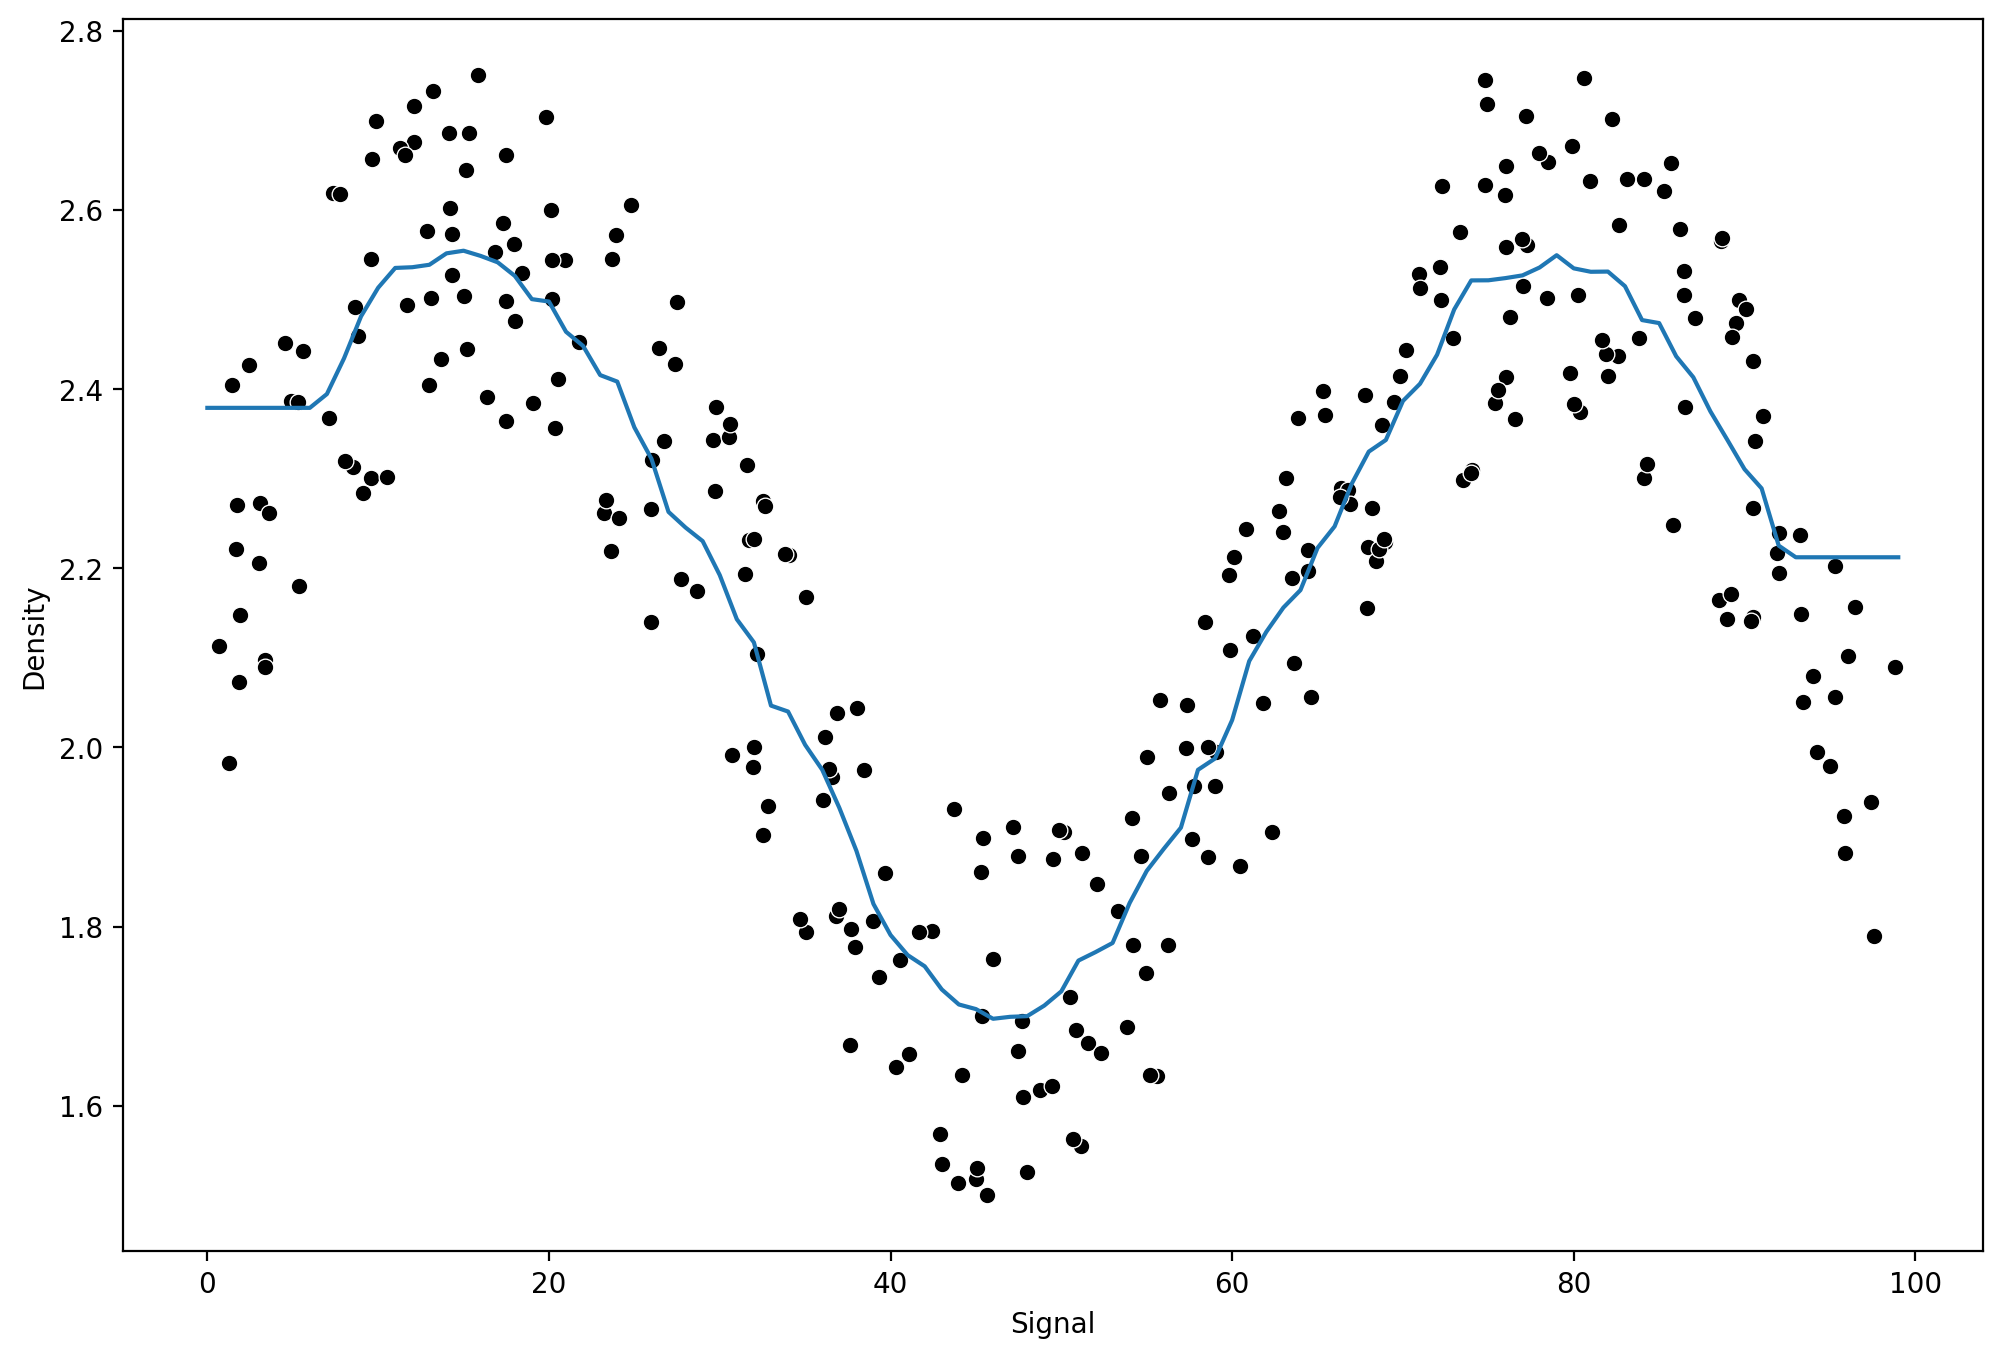

In [157]:
# model = KNeighborsRegressor()
K_values = [1,5,10,20,30]

for n in K_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [158]:
# KNN becames bias as we increase k-value

In [159]:
# Let's try with Decision Tree Regressor

In [160]:
from sklearn.tree import DecisionTreeRegressor


    Results:

    MAE: 0.11877297474442386

    RMSE: 0.15234870286353372

    


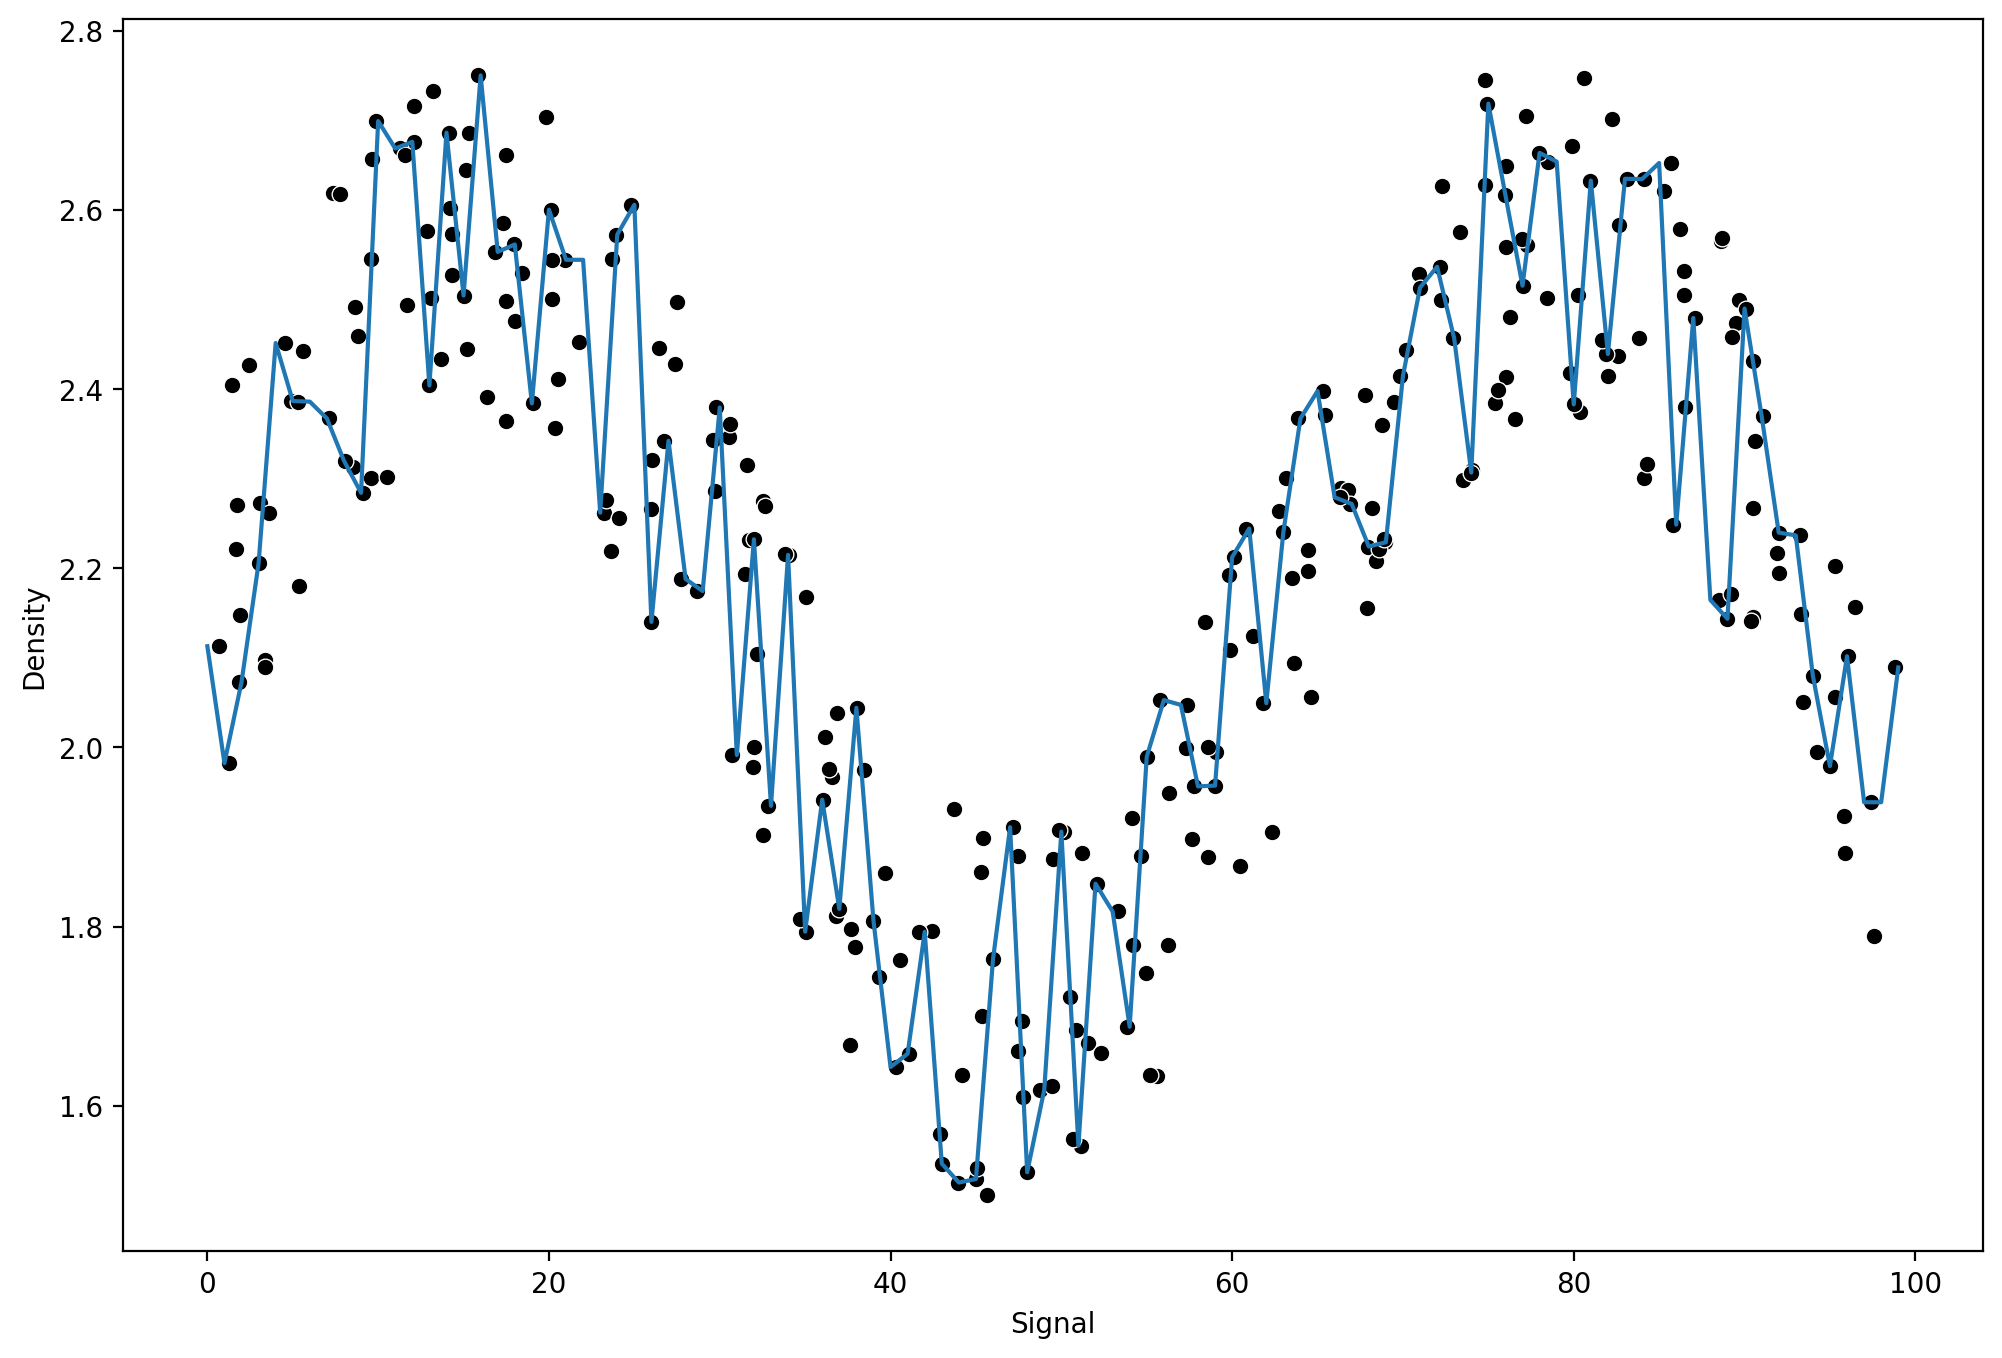

In [161]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [162]:
from sklearn.svm import SVR

In [163]:
svr = SVR()

param_grid = {'C':[0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma':['auto', 'scale']}

grid_model = GridSearchCV(svr, param_grid)


    Results:

    MAE: 0.10839555187432501

    RMSE: 0.1263507854819897

    


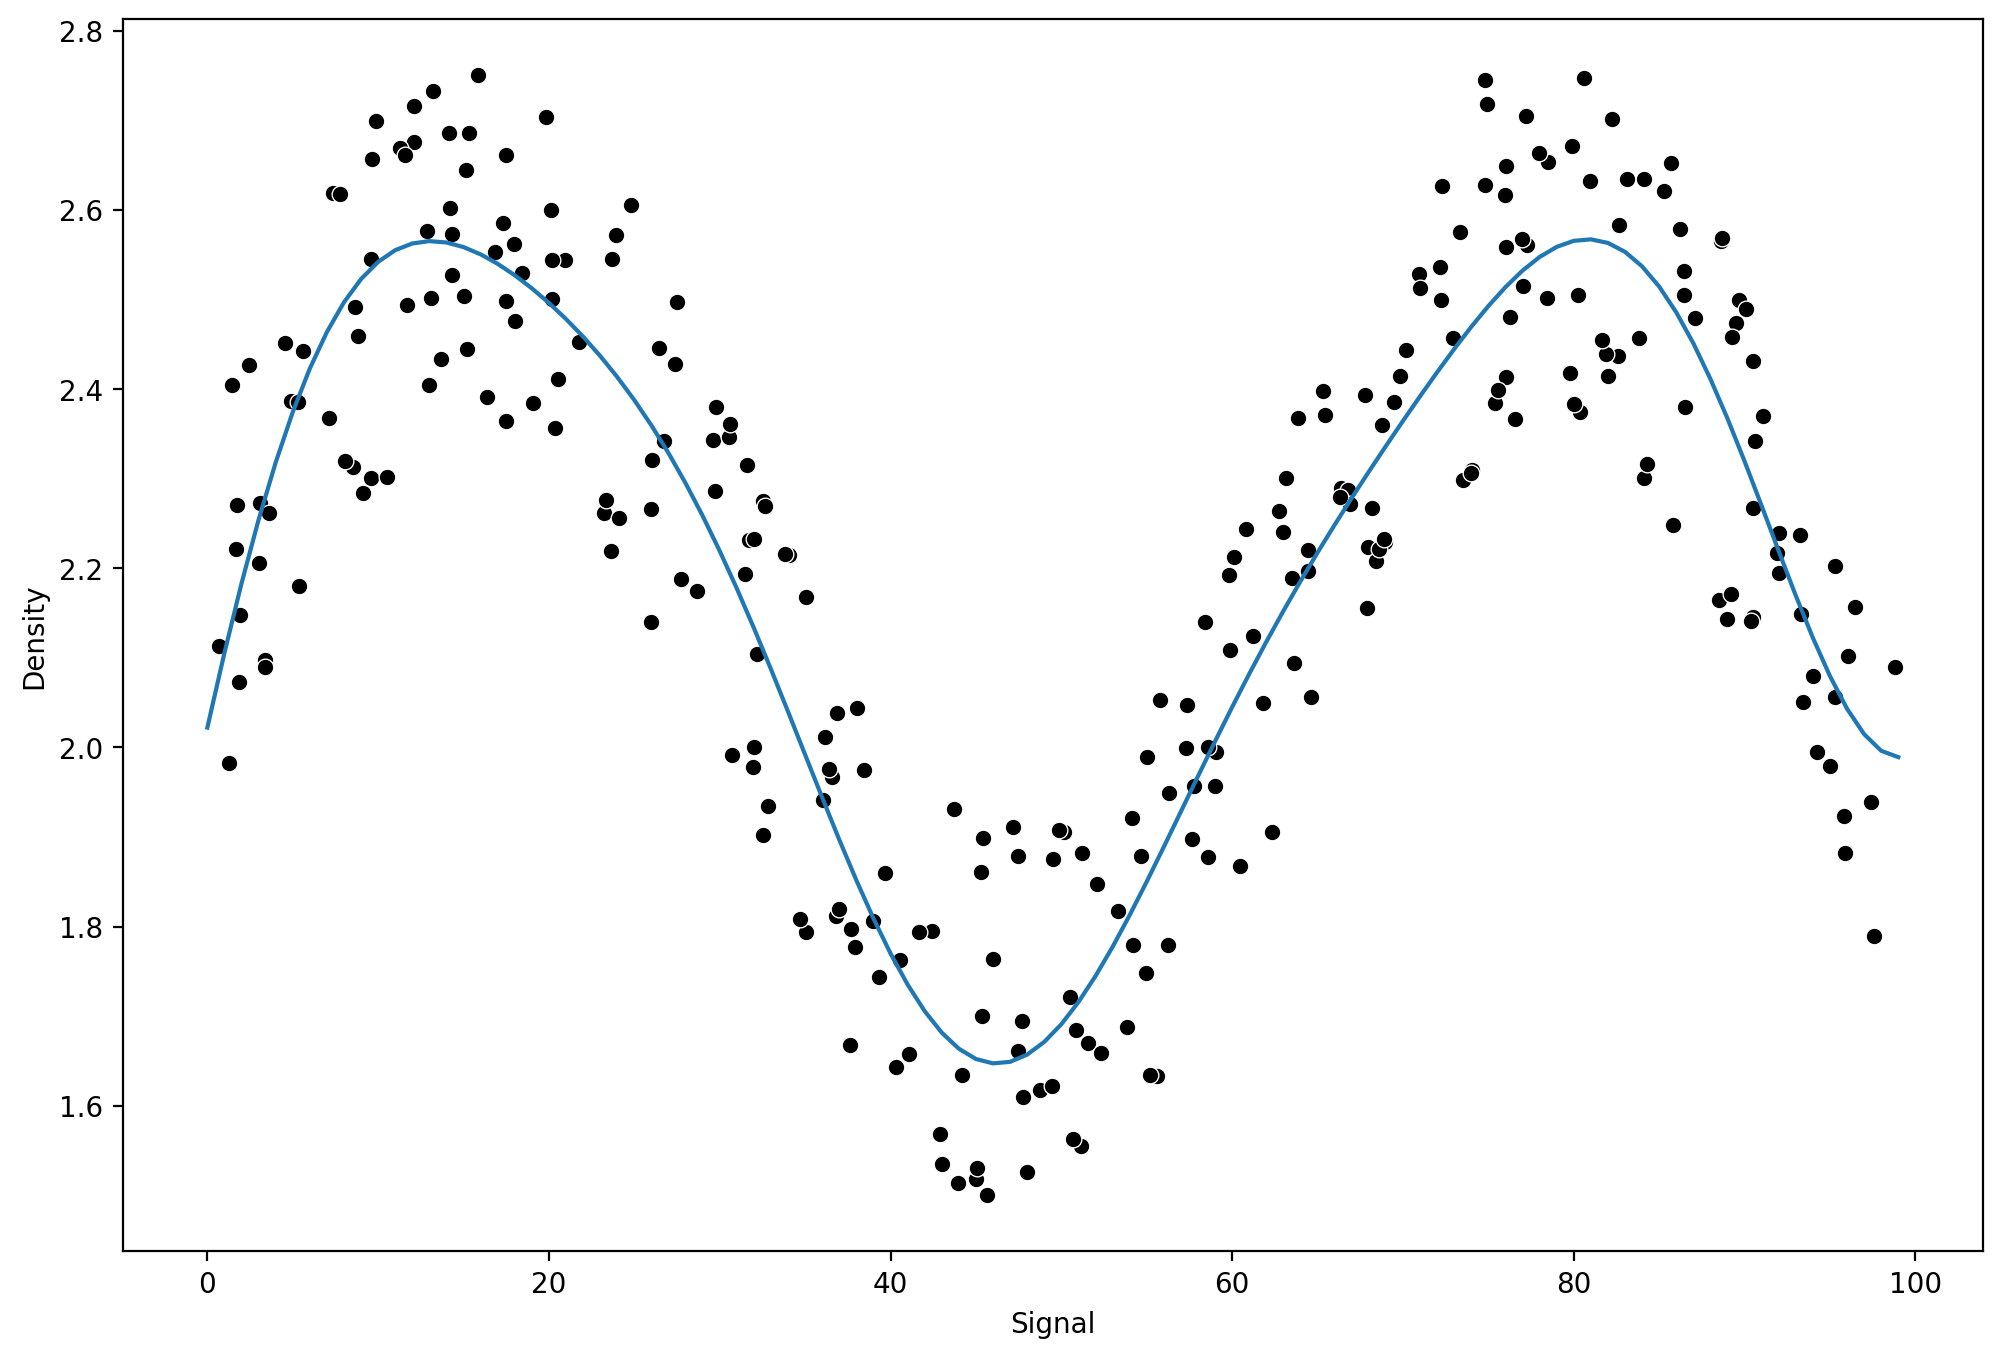

In [164]:
run_model(grid_model, X_train, y_train, X_test, y_test)

In [165]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
rfr = RandomForestRegressor(n_estimators=10)


    Results:

    MAE: 0.11550214262498351

    RMSE: 0.13865926129257705

    


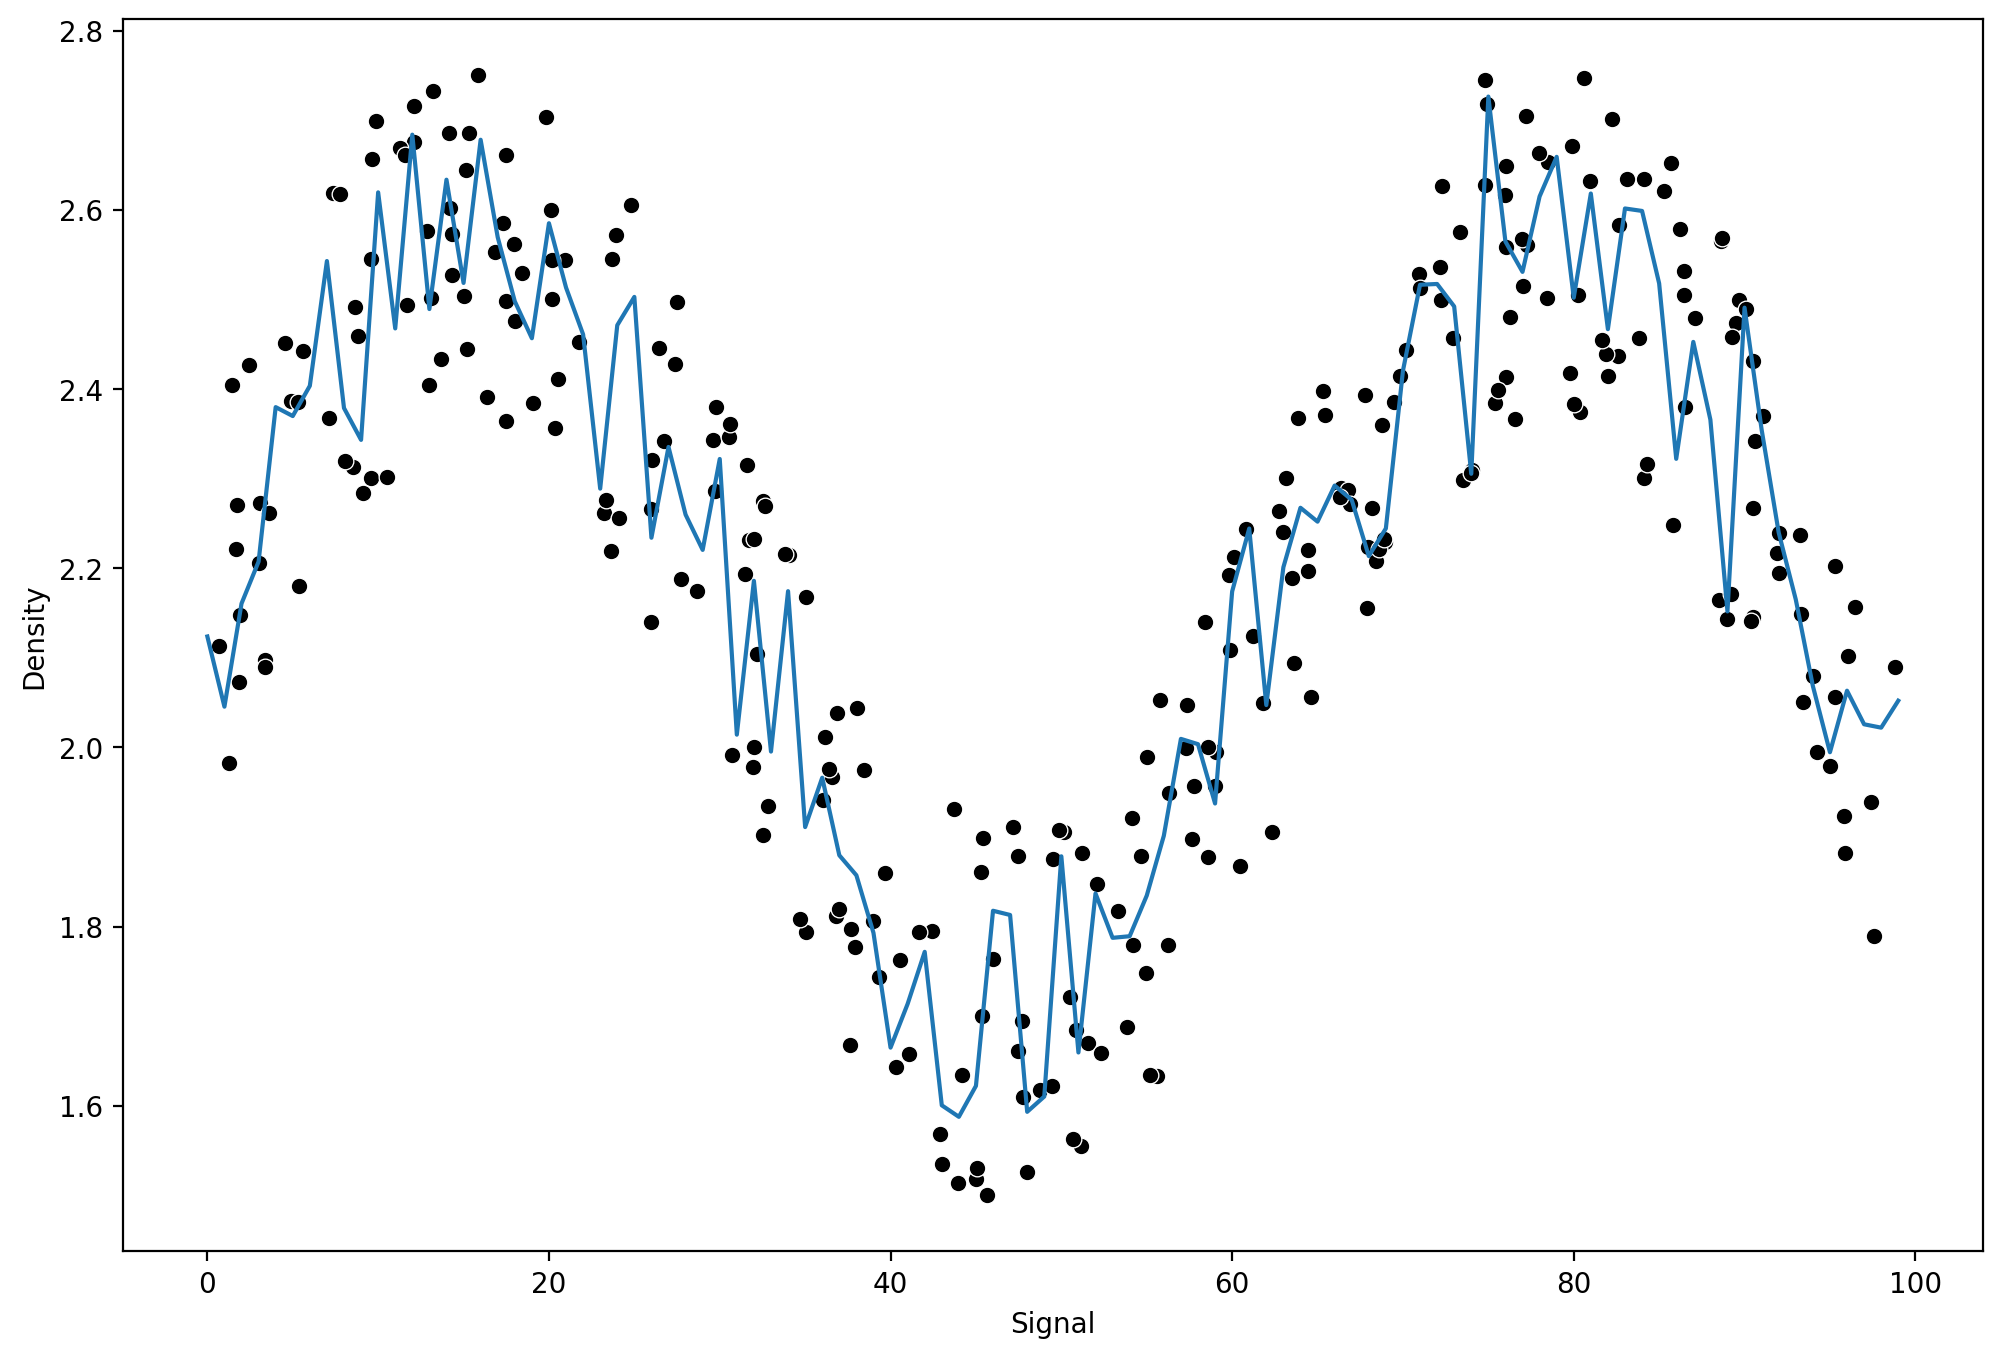

In [167]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [168]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor


    Results:

    MAE: 0.11318284854800688

    RMSE: 0.13294148649584664

    


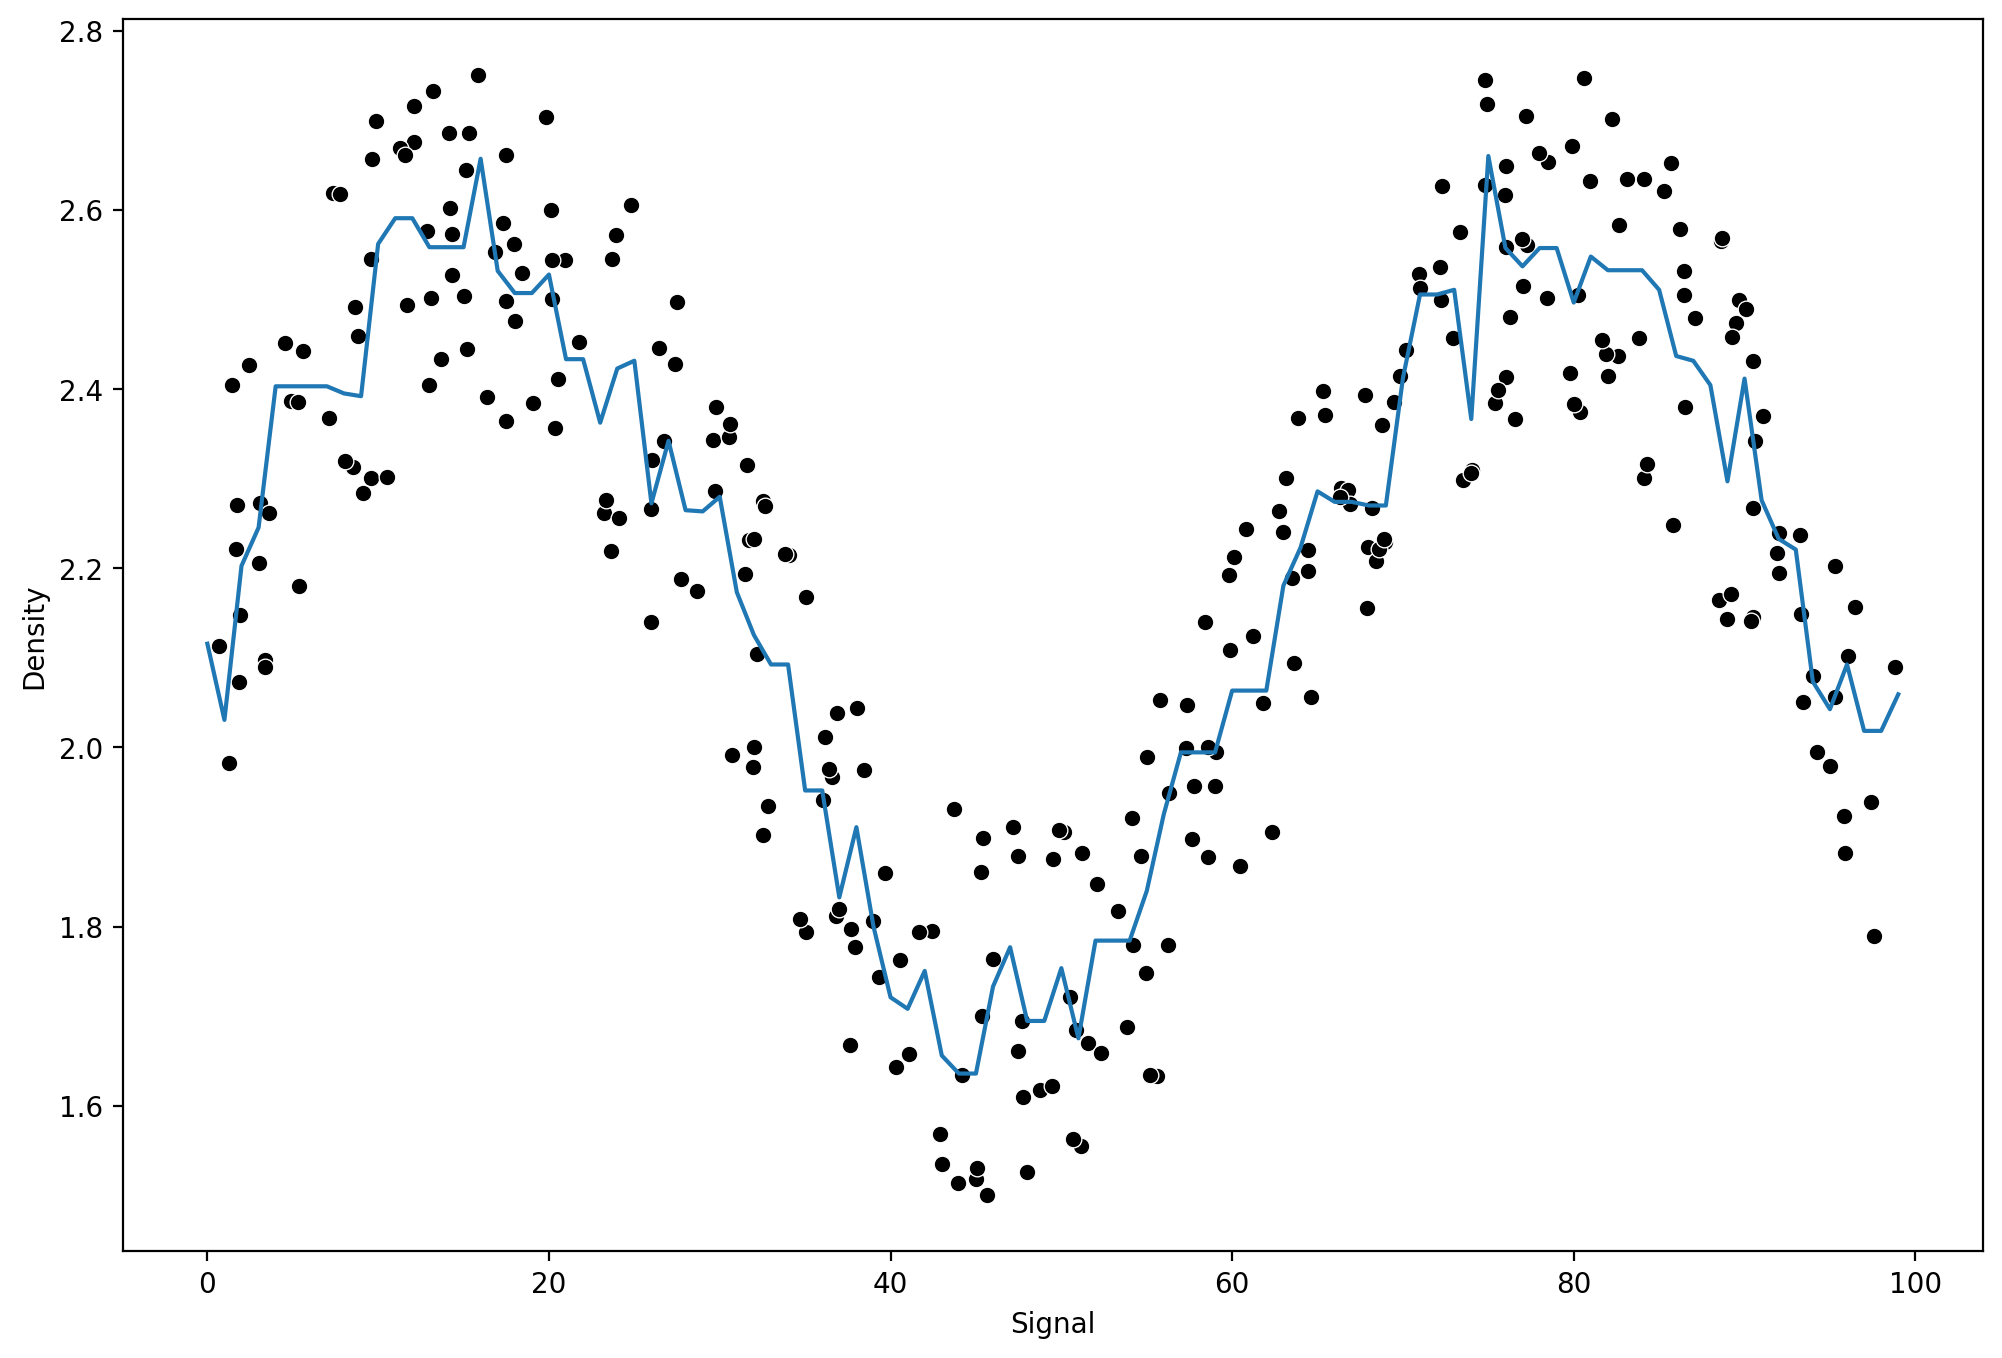

In [169]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)


    Results:

    MAE: 0.1214909970138949

    RMSE: 0.13975892065173767

    


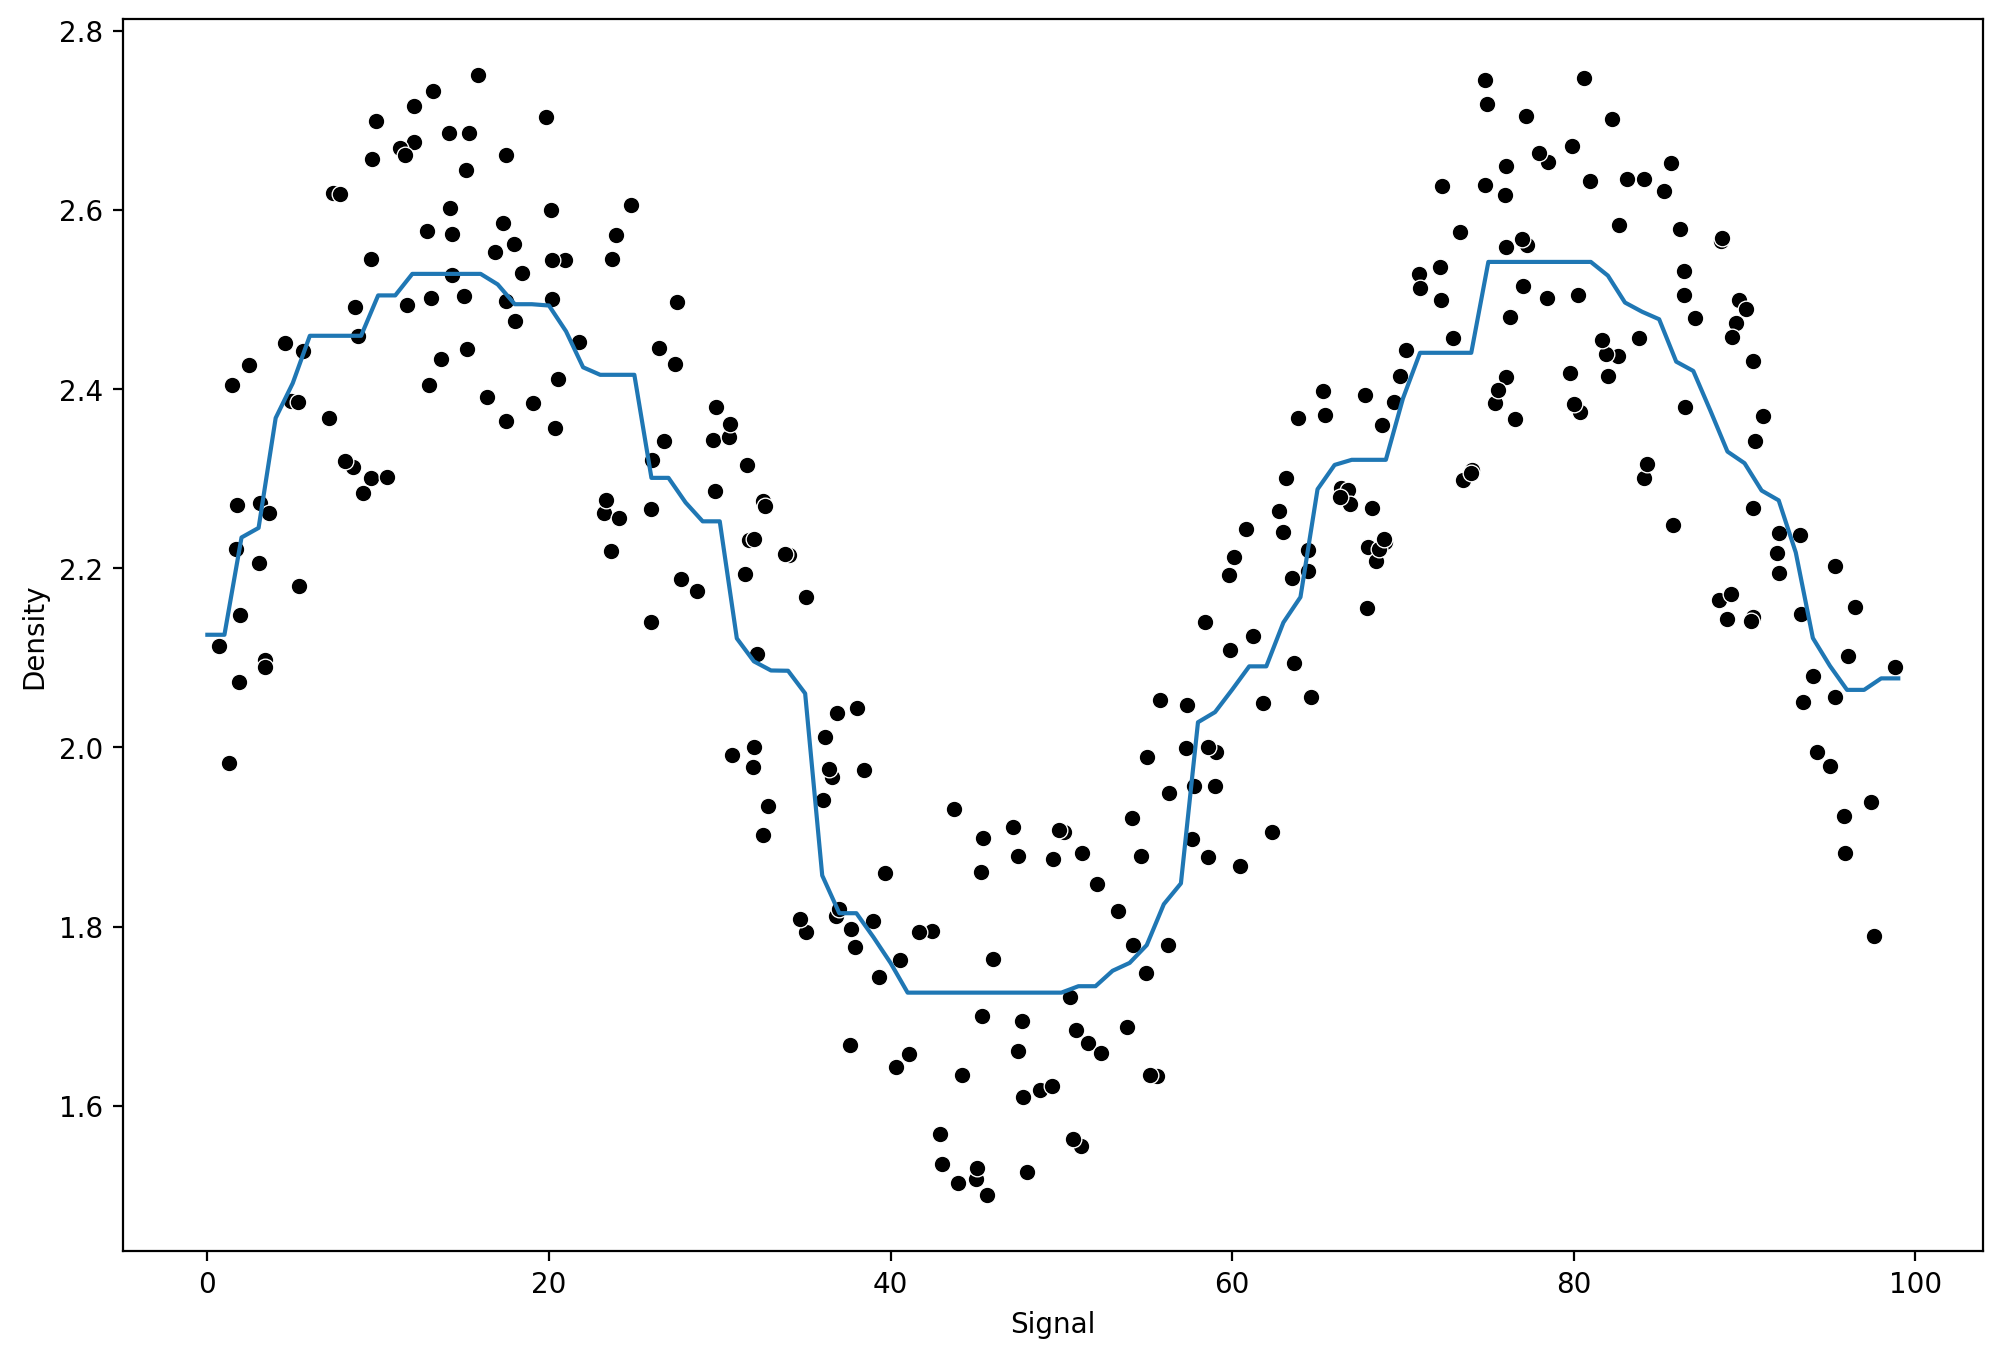

In [170]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [173]:
!git config pull.rebase false

In [174]:
!git pull

hint: Waiting for your editor to close the file... 7[>4;2m="~/Desktop/ML Learning Pathway/Algorithms/.git/MERGE_MSG" 6L, 302B▽  Pzz\[0%m           [>c]10;?]11;?Merge branch 'main' of https://github.com/AbhinavKharde/ML-Learning-Journey
# Please enter a commit message to explain why this merge is necessary,# especially if it merges an updated upstream into a topic branch.#
# Lines starting with '#' will be ignored, and an empty message aborts
# the commit.
Type  :qa  and press <Enter> to exit Vi          ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                              

In [180]:
# Let's save this notebook
save_to_github("Random Forest Algorithm added")

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 1008 bytes | 168.00 KiB/s, done.
From https://github.com/AbhinavKharde/ML-Learning-Journey
   6d06f29..53200f8  main       -> origin/main
7[>4;2m="~/Desktop/ML Learning Pathway/Algorithms/.git/MERGE_MSG" 6L, 302B▽  Pzz\[0%m           [>c]10;?]11;?Merge branch 'main' of https://github.com/AbhinavKharde/ML-Learning-Journey
# Please enter a commit message to explain why this merge is necessary,# especially if it merges an updated upstream into a topic branch.#
# Lines starting with '#' will be ignored, and an empty message aborts
# the commit.
Type  :qa  and press <Enter> to exit ViStaging changes...                                                                              ~                                                                           